# External modules

In [1]:
options(tidyverse.quiet = TRUE)
options(caret.quiet = TRUE)
options(Hmisc.quiet = TRUE)
options(vroom.quiet = TRUE)

In [2]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




# Internal functions

In [3]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/read_data.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/load_functions.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/make_models.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/transform_data.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/calculate_model_aic.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/save_multiple_model_aic.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/extract_multiple_model_aic.R"))



Attaching package: ‘vroom’


The following objects are masked from ‘package:readr’:

    as.col_spec, col_character, col_date, col_datetime, col_double,
    col_factor, col_guess, col_integer, col_logical, col_number,
    col_skip, col_time, cols, cols_condense, cols_only, date_names,
    date_names_lang, date_names_langs, default_locale, fwf_cols,
    fwf_empty, fwf_positions, fwf_widths, locale, output_column,
    problems, spec


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [4]:
# path <- ".."
#
# xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
# xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
# xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
# xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
# xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
# xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
# xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
# xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
# xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
# xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
# xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
# xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))
# 
# xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
# xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))

In [5]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [6]:
data_path <- "./04_experimentation_01/merged_data.csv"

data <- xfun::in_dir(dir = path, expr = read_data(data_path))

In [7]:
str(data)

'data.frame':	22846 obs. of  52 variables:
 $ timestamp            : int  17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 17608320 ...
 $ latitude             : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude            : num  2.46 2.46 2.46 2.46 2.46 ...
 $ lateral_error        : num  -0.571 -0.566 -0.56 -0.592 -0.57 ...
 $ longitudinal_error   : num  0.0775 0.0832 0.0979 0.1043 0.1078 ...
 $ latitude_error       : num  4.77e-06 4.73e-06 5.57e-06 4.96e-06 5.20e-06 ...
 $ longitude_error      : num  1.33e-07 2.49e-07 3.92e-07 5.62e-07 6.13e-07 ...
 $ velocity_latitude    : num  -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 -4.04e-11 ...
 $ velocity_longitude   : num  9.48e-12 7.09e-12 6.72e-12 8.41e-12 6.65e-12 ...
 $ velocity             : num  5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ name_airplane        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench..group.   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n

## Outliers analysis

In [8]:
# transform data
response_var <- "lateral_error"

data_object <- transform_data(data = data, 
                              response_var = response_var,
                              response_abs = TRUE,
                              scale_predictors = TRUE,
                              coefficient_iqr = 9, 
                              remove_outliers = FALSE,
                              method = c("interpolate", "mode", "median", "mean")[1])

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [9]:
outlier_positions <- data_object$outlier_positions

outlier_positions

[1]  2347  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358
 [13]  2359  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2370
 [25]  2371  2372  2373  2374  2375  2376  2377  2378  2379  2380  2381  2382
 [37]  2383  2384  2385  2386  2387  2388  2389  2390  2391  2392  2393  2394
 [49]  2395  4810  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820
 [61]  4821  4822  4823  4824  4825  4826  4827  4828 16604 16605 16606 16607
 [73] 16608 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619
 [85] 16620 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631
 [97] 16632 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642 16643
[109] 16644 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654 18391
[121] 18392 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403
[133] 18404 18405 18406 18407 18408 18409 18410 18411 18416 18417 18418 18419
[145] 18420 18421 18422 18423 18424 18425 18426 18427 18428 18429 18430 18431
[157] 18432 18433 18434 18435 18436 18437 18438 18439 18440 18441 18442 18443
[169] 18444 18445 18446 18447 18448 18449 18450 18451 18452 18453 18454 18455
[181] 18456 18457 18458 18459 18460 18461 18462 18463 18464 18465 18466 18467
[193] 18468 18469 18470 18471 18472 18473 18474 18475 18476 18477 18478 18479
[205] 18480 18481 18482 18483 18484 18485 18486 18487 18488 18489 18490 18491
[217] 18492 18493 18494 18495 18496 18497 18498 18499 18500 18501 18502 18503
[229] 18504 18505 18506 18507 18508 18509 18510 18511 18512 18513 18514 18515
[241] 18516 18517 18518 18519 18520 18521 18522 18523 18524 18525 18526 18527
[253] 18528 18529 18530 18531 18532 18533 18534 18535 18536 18537 18538 18539
[265] 18540 18541 18542 18543 18544 18545 18546 18547 18548 18549 18550 18551
[277] 18552 18553 18554 18555 18556 18557 18558 18559 18560 18561 18562 18563
[289] 18564 18565 18566 18567 18568 18569 18570 18571 18572 18573 18574 18575
[301] 18576 18577 18578 18579 18580

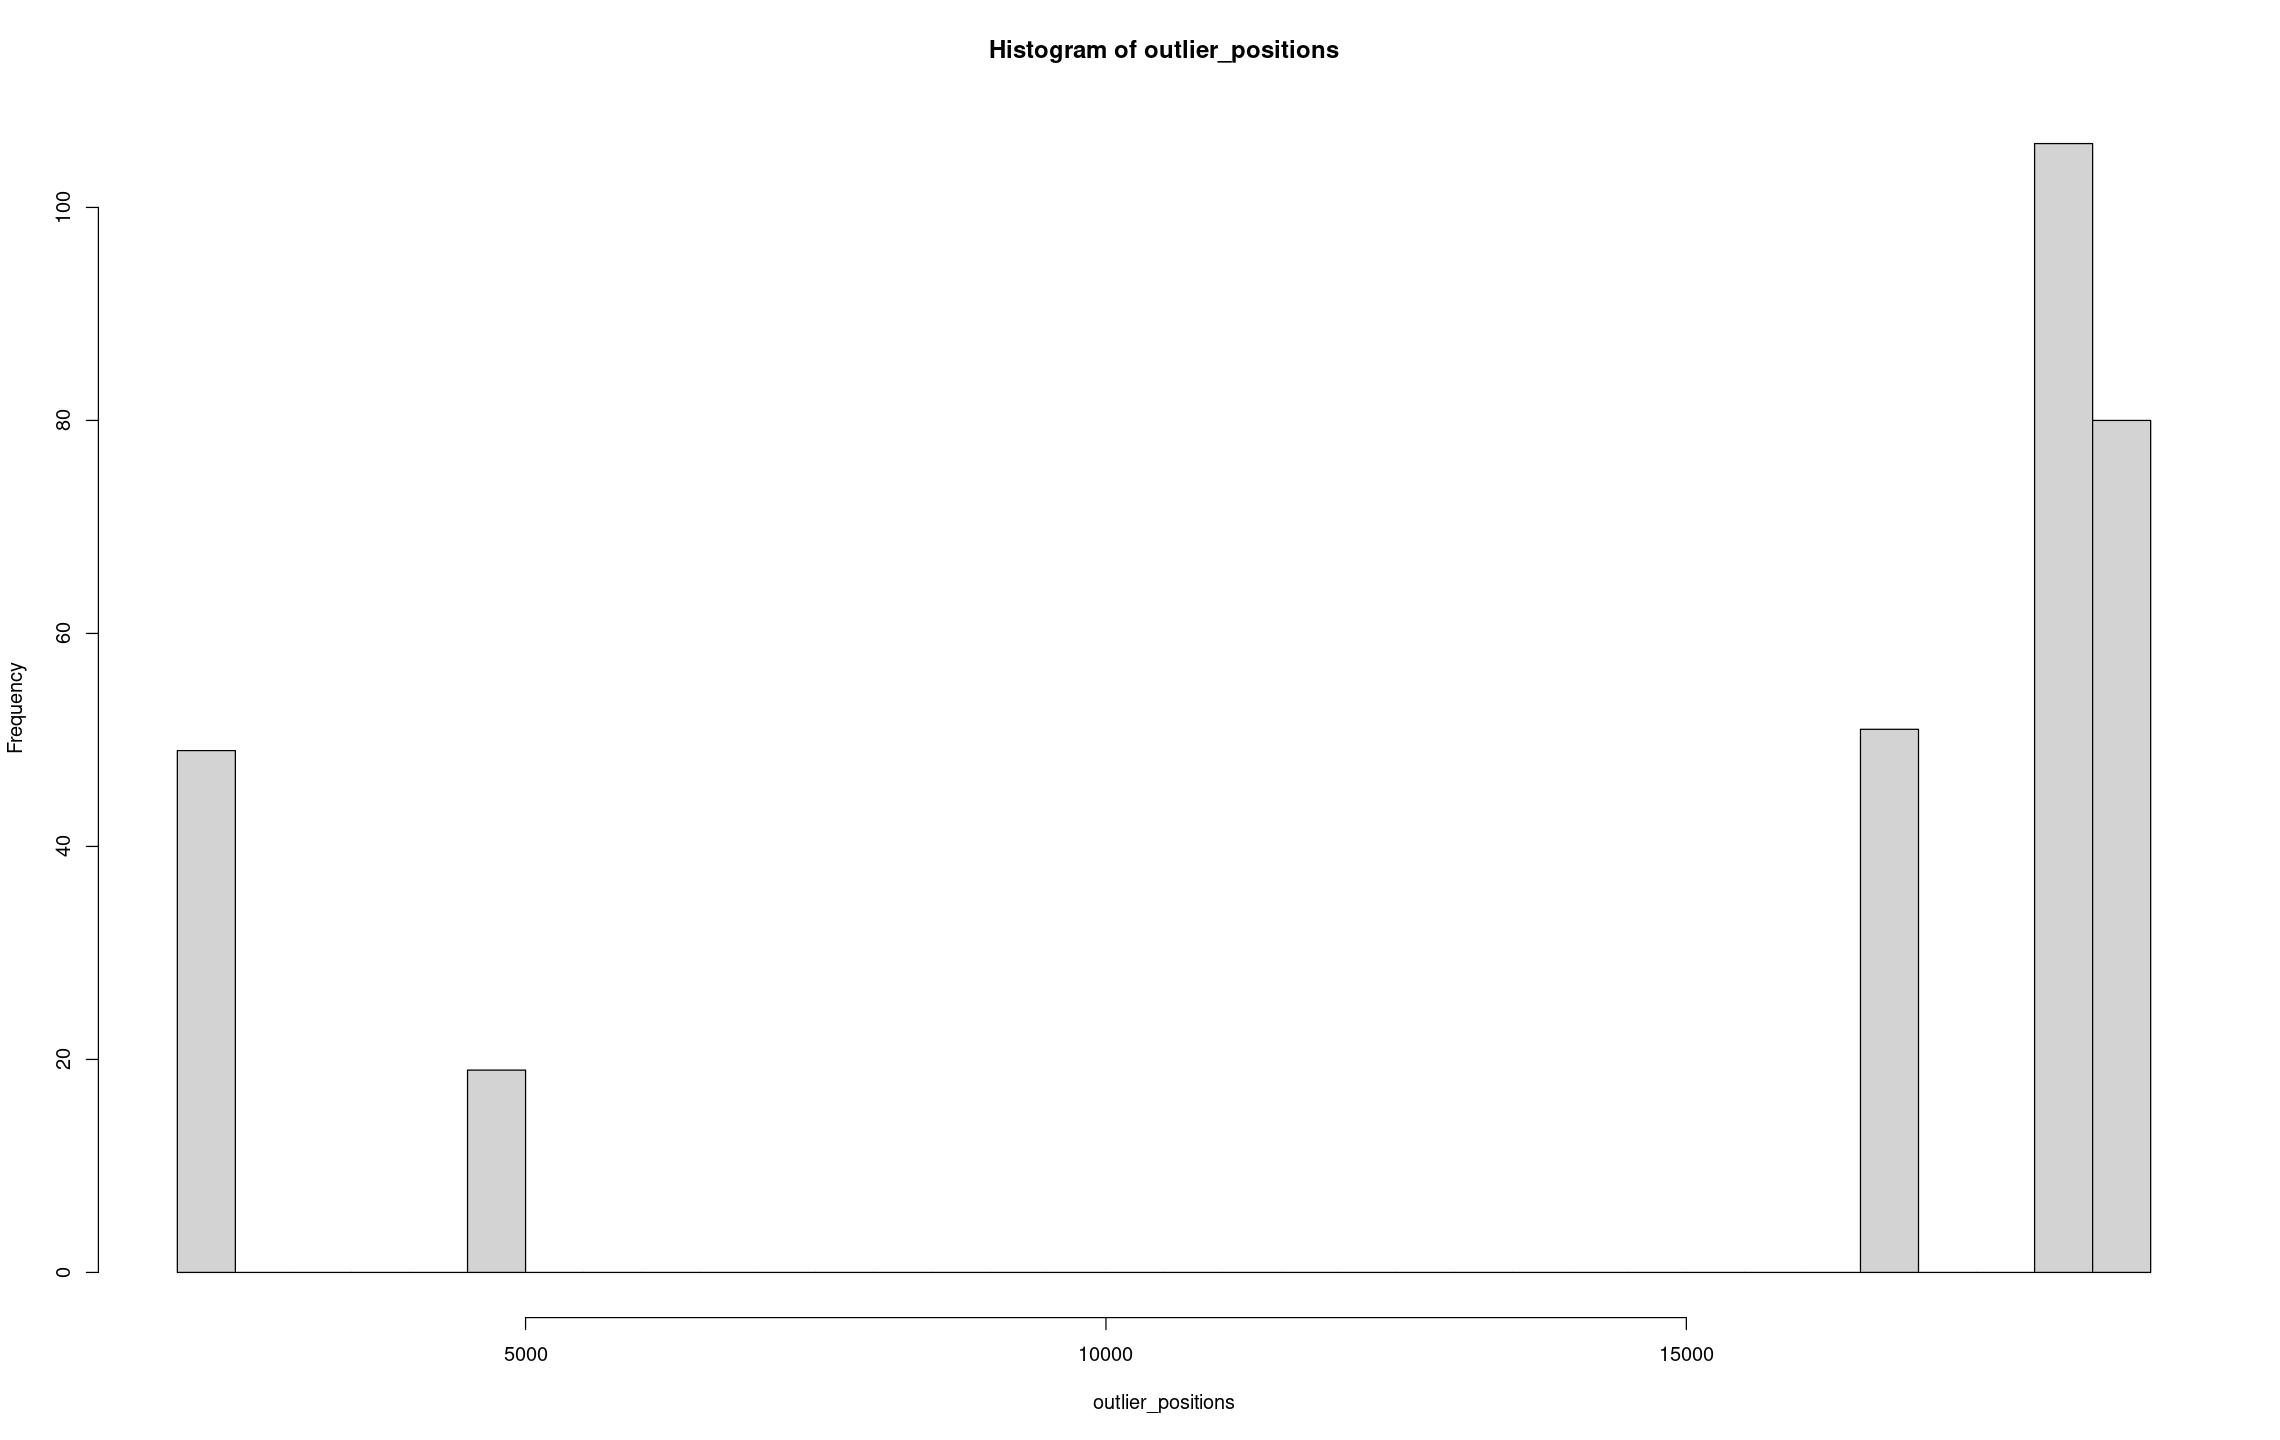

In [10]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

In [11]:
outlier_values <- data_object$outlier_values

outlier_values

[1]  5.030237198  5.387993336  6.455604553  7.014128208  7.308514118
  [6]  7.610935688  7.798225880  7.907556057  8.119622231  8.187675476
 [11]  8.186152458  8.221673012  8.253808022  8.279128075  8.194468498
 [16]  8.205458641  8.178217888  8.108373642  8.057738304  8.026419640
 [21]  7.876454353  7.860546589  7.798650265  7.701650620  7.596509933
 [26]  7.634211063  7.527653217  7.466311932  7.330577850  7.255169392
 [31]  7.133202553  7.059005737  6.932627678  6.885303974  6.739459038
 [36]  6.542611599  6.318865776  6.100600719  5.890760899  5.718430042
 [41]  5.592728138  5.498566151  5.406100273  5.272714138  5.224787712
 [46]  5.182562351  5.120712280  5.015984535  5.037686348  7.775327206
 [51]  7.452221394  7.210327625  6.872229576  6.687652588  6.562489986
 [56]  6.237672329  6.103162289  6.022470474  5.966412067  5.950079918
 [61]  5.930442810  5.913148403  5.852420807  5.738059044  5.540972710
 [66]  5.297889233  5.168659210  5.013502598  5.273302078  6.326401711
 [71]  6.946446896  7.370677948  8.057784081  8.502832413  9.473826408
 [76] 10.397840500 10.922791481 11.694986343 11.936242104 12.247079849
 [81] 12.887074470 13.256324768 13.450218201 13.612427712 13.801614761
 [86] 13.892393112 14.008658409 14.114330292 14.538104057 14.871605873
 [91] 15.106700897 15.408733368 15.590641022 15.815428734 16.214225769
 [96] 16.604370117 17.295207977 17.692142487 18.242160797 18.493989945
[101] 19.090238571 19.255954742 19.428293228 20.025951386 20.202747345
[106] 20.307353973 20.858482361 21.330503464 21.402330399 21.562334061
[111] 21.750417709 21.895032883 22.090166092 22.273391724 22.054981232
[116] 21.796689987 21.498889923 17.923336029  8.142934799  5.712432861
[121]  6.108156204  6.311995506  6.436964035  6.649435520  6.653500557
[126]  6.735800743  6.721082687  6.663797379  6.597108364  6.459681511
[131]  6.310772896  6.002843380  5.942730904  5.823526859  5.711785316
[136]  5.667007923  5.651128292  5.670092583  5.592570305  5.393000603
[141]  5.570847988  7.069868565  7.269009113  7.238419533  7.304058552
[146]  7.307997227  7.329240322  7.383411407  7.439856052  7.458771229
[151]  7.550690174  7.588142872  7.769646645  7.892141819  7.998895168
[156]  8.275163651  8.437351227  8.638635635  8.755347252  8.906926155
[161]  8.998470306  9.155323982  9.314714432  9.436856270  9.506617546
[166]  9.574791908  9.679572105  9.882457733 10.080101013 10.229024887
[171] 10.747855187 10.925580978 11.277595520 11.519678116 12.310634613
[176] 13.360582352 13.898347855 14.398936272 14.614928245 14.803196907
[181] 15.087105751 15.133486748 15.129502296 15.208720207 15.209801674
[186] 15.234956741 15.176564217 15.190121651 15.222224236 15.230353355
[191] 15.276042938 15.245158196 15.270928383 15.299601555 15.307911873
[196] 15.303745270 15.273931503 15.243393898 15.240942955 15.255673408
[201] 15.265043259 15.281039238 15.288377762 15.316594124 15.342389107
[206] 15.310406685 15.283331871 15.313362122 15.278633118 15.294309616
[211] 15.304340362 15.331607819 15.337777138 15.358584404 15.306885719
[216] 15.347656250 15.366465569 15.334030151 15.306579590 15.342056274
[221] 15.343005180 15.310344696 15.347384453 15.325051308 15.322481155
[226] 15.361774445 15.343997002 15.336746216 15.345203400 15.317010879
[231] 15.325157166 15.351271629 15.359509468 15.359265327 15.332750320
[236] 15.351813316 15.371981621 15.352944374 15.351099014 15.351573944
[241] 15.334820747 15.334497452 15.371029854 15.348582268 15.336625099
[246] 15.371048927 15.314455986 15.357525825 15.374097824 15.357522964
[251] 15.376098633 15.393821716 15.405430794 15.405833244 15.375905991
[256] 15.385688782 15.397150993 15.382903099 15.403863907 15.411539078
[261] 15.369255066 15.385082245 15.390220642 15.413284302 15.349900246
[266] 15.359240532 15.358036041 15.361072540 15.372542381 15.371520996
[271] 15.373834610 15.343359947 15.364955902 15.339401245 15.345736504
[276] 15.344909668 15.370442390 15.397288322 15.377240181 15.341447830
[281] 15.334659576 15.3360

In [12]:
options(repr.plot.width=19, repr.plot.height=12)

describe(outlier_values)

outlier_values 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     305        0      305        1    11.99    5.039    5.547    5.935 
     .25      .50      .75      .90      .95 
   7.440   14.399   15.345   15.405   19.223 

lowest : 5.0135  5.01598 5.03024 5.03769 5.12071
highest: 21.7967 21.895  22.055  22.0902 22.2734

In [13]:
outlier_substitutes <- data_object$outlier_substitutes

data.frame("outlier_values" = outlier_values, "outlier_substitutes" = outlier_substitutes)

outlier_values,outlier_substitutes
<dbl>,<dbl>
5.030237198,4.276246424
5.387993336,4.290543308
6.455604553,4.304840193
7.014128208,4.319137077
7.308514118,4.333433962
7.610935688,4.347730846
7.798225880,4.362027731
7.907556057,4.376324615
8.119622231,4.390621500


## Response variable

In [14]:
x <- data_object$response

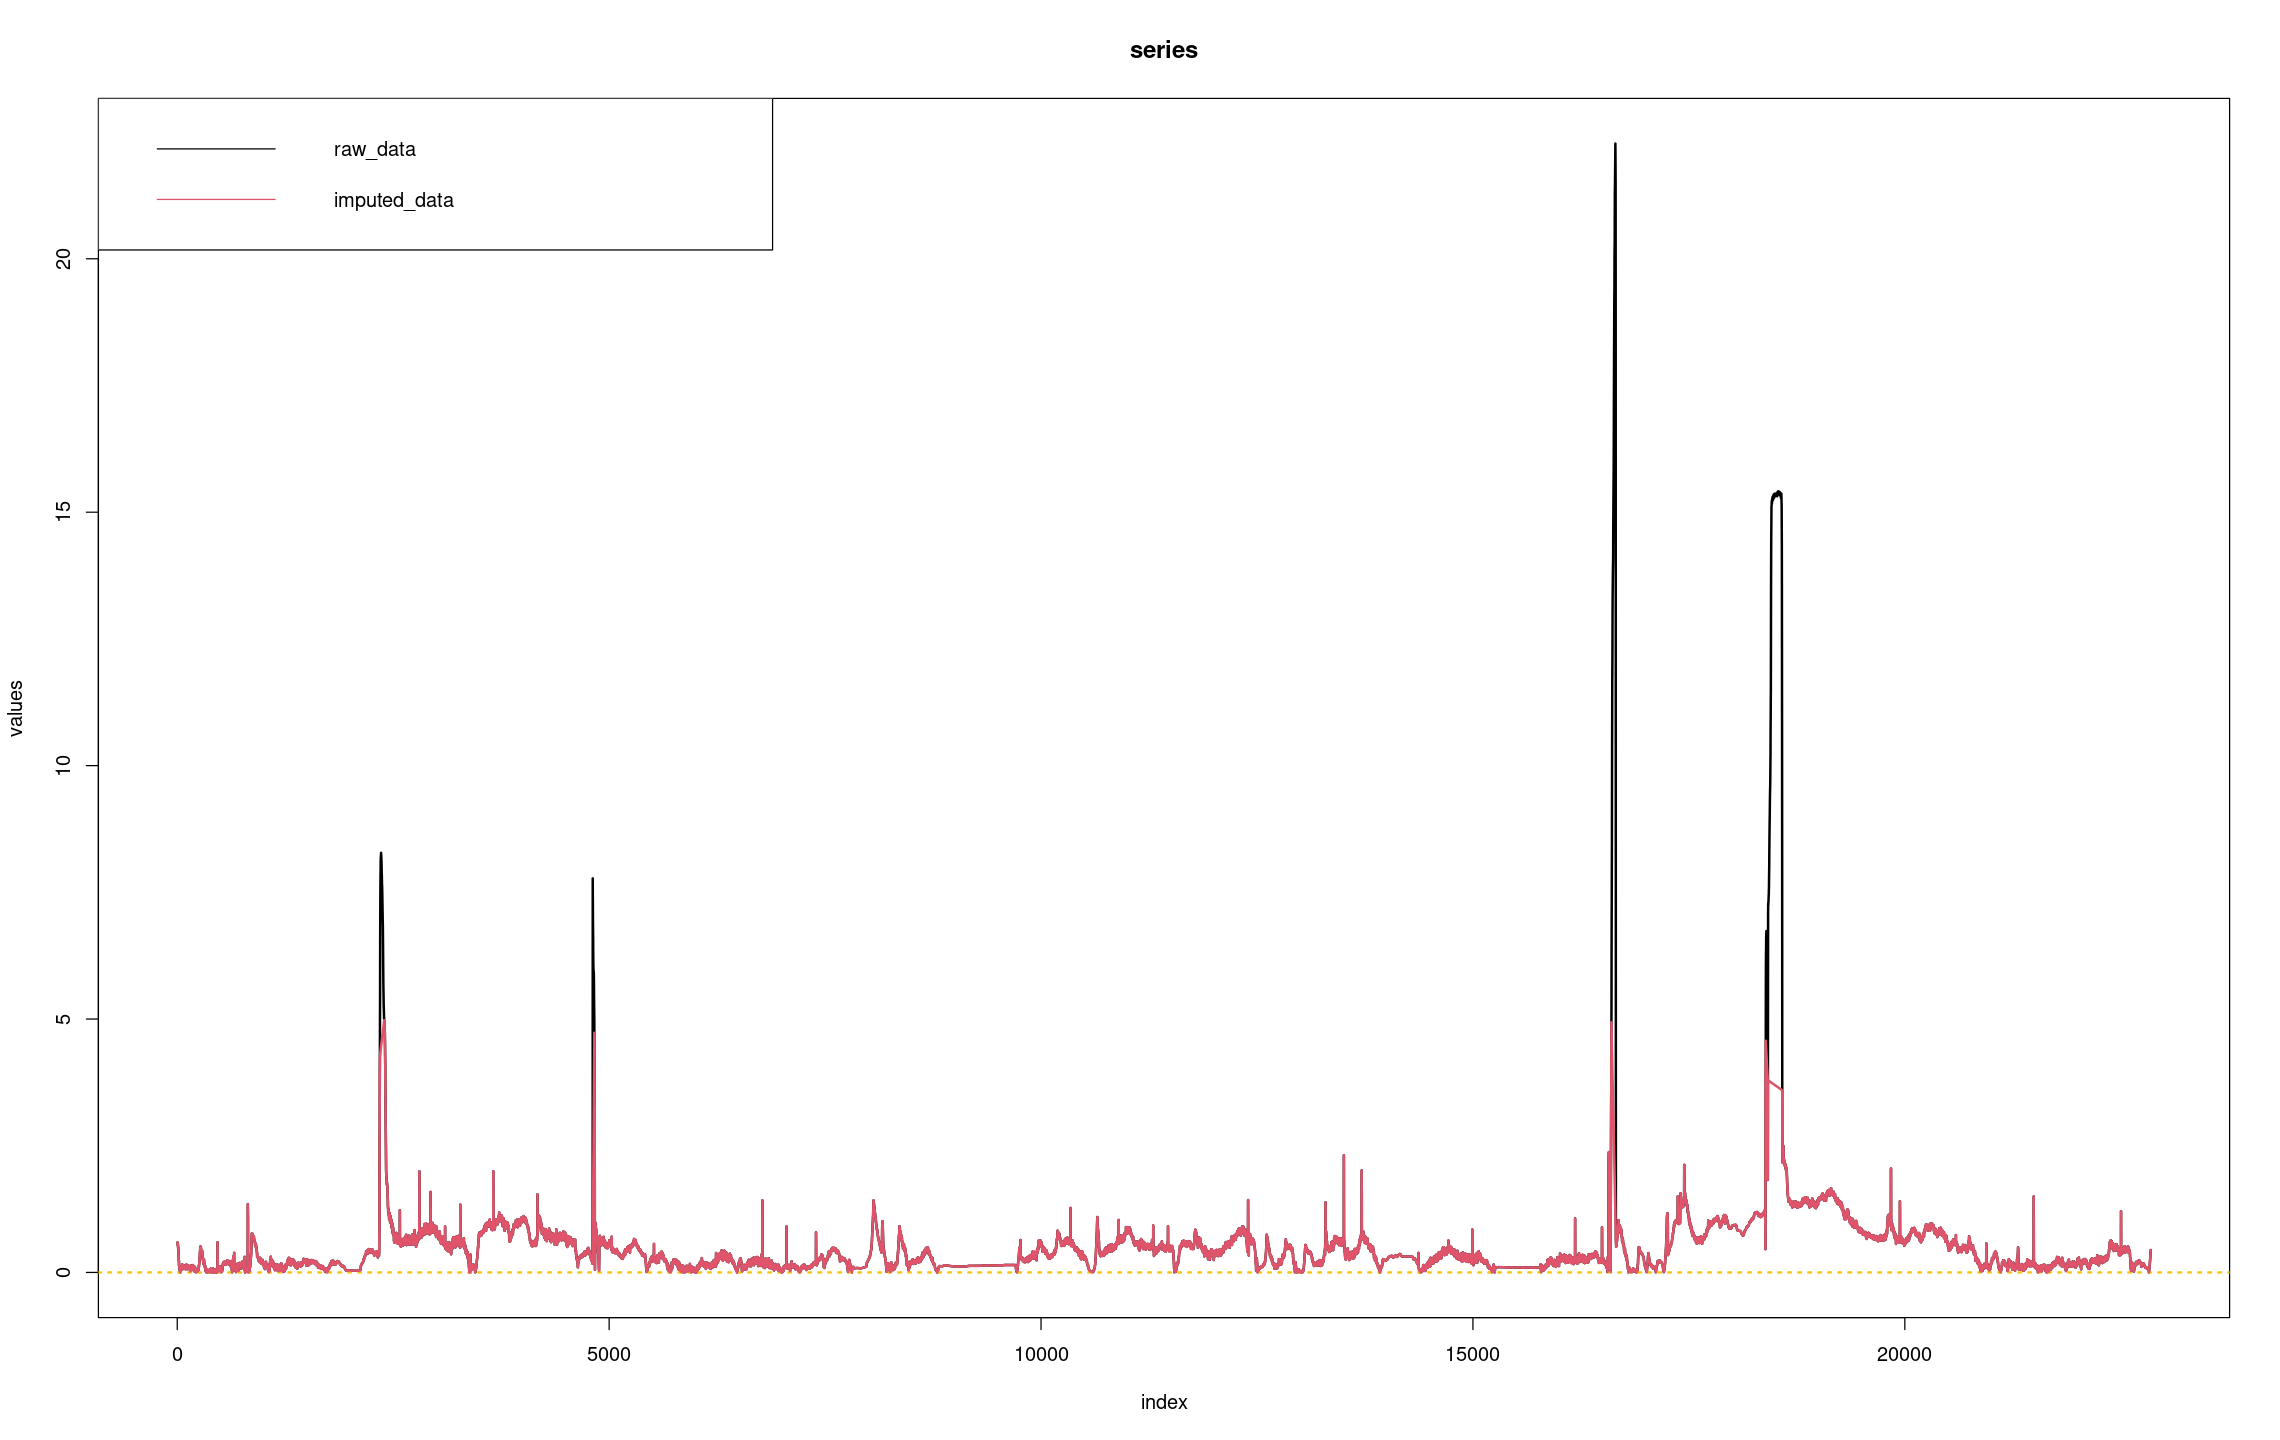

In [15]:
options(repr.plot.width=19, repr.plot.height=12)

plot(abs(data[, response_var]), 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")

abline(h = 0, lty = "dotted", col = 7, lwd = 2)

lines(x, col = 2, lwd = 2)

legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           22'846           22'846                0           22'580
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0481903096661  0.0872314460575  0.1457093060018  0.3255155980590
                                                                    
            range               sd            vcoef              mad
  4.9767084120450  0.5421802981304  1.1428696750141  0.3093819649219
                                                                    
               0s             mean            meanCI
                0  0.4744025587377   0.4673716777438
             0.0%                    0.4814334397315
                                                    
    

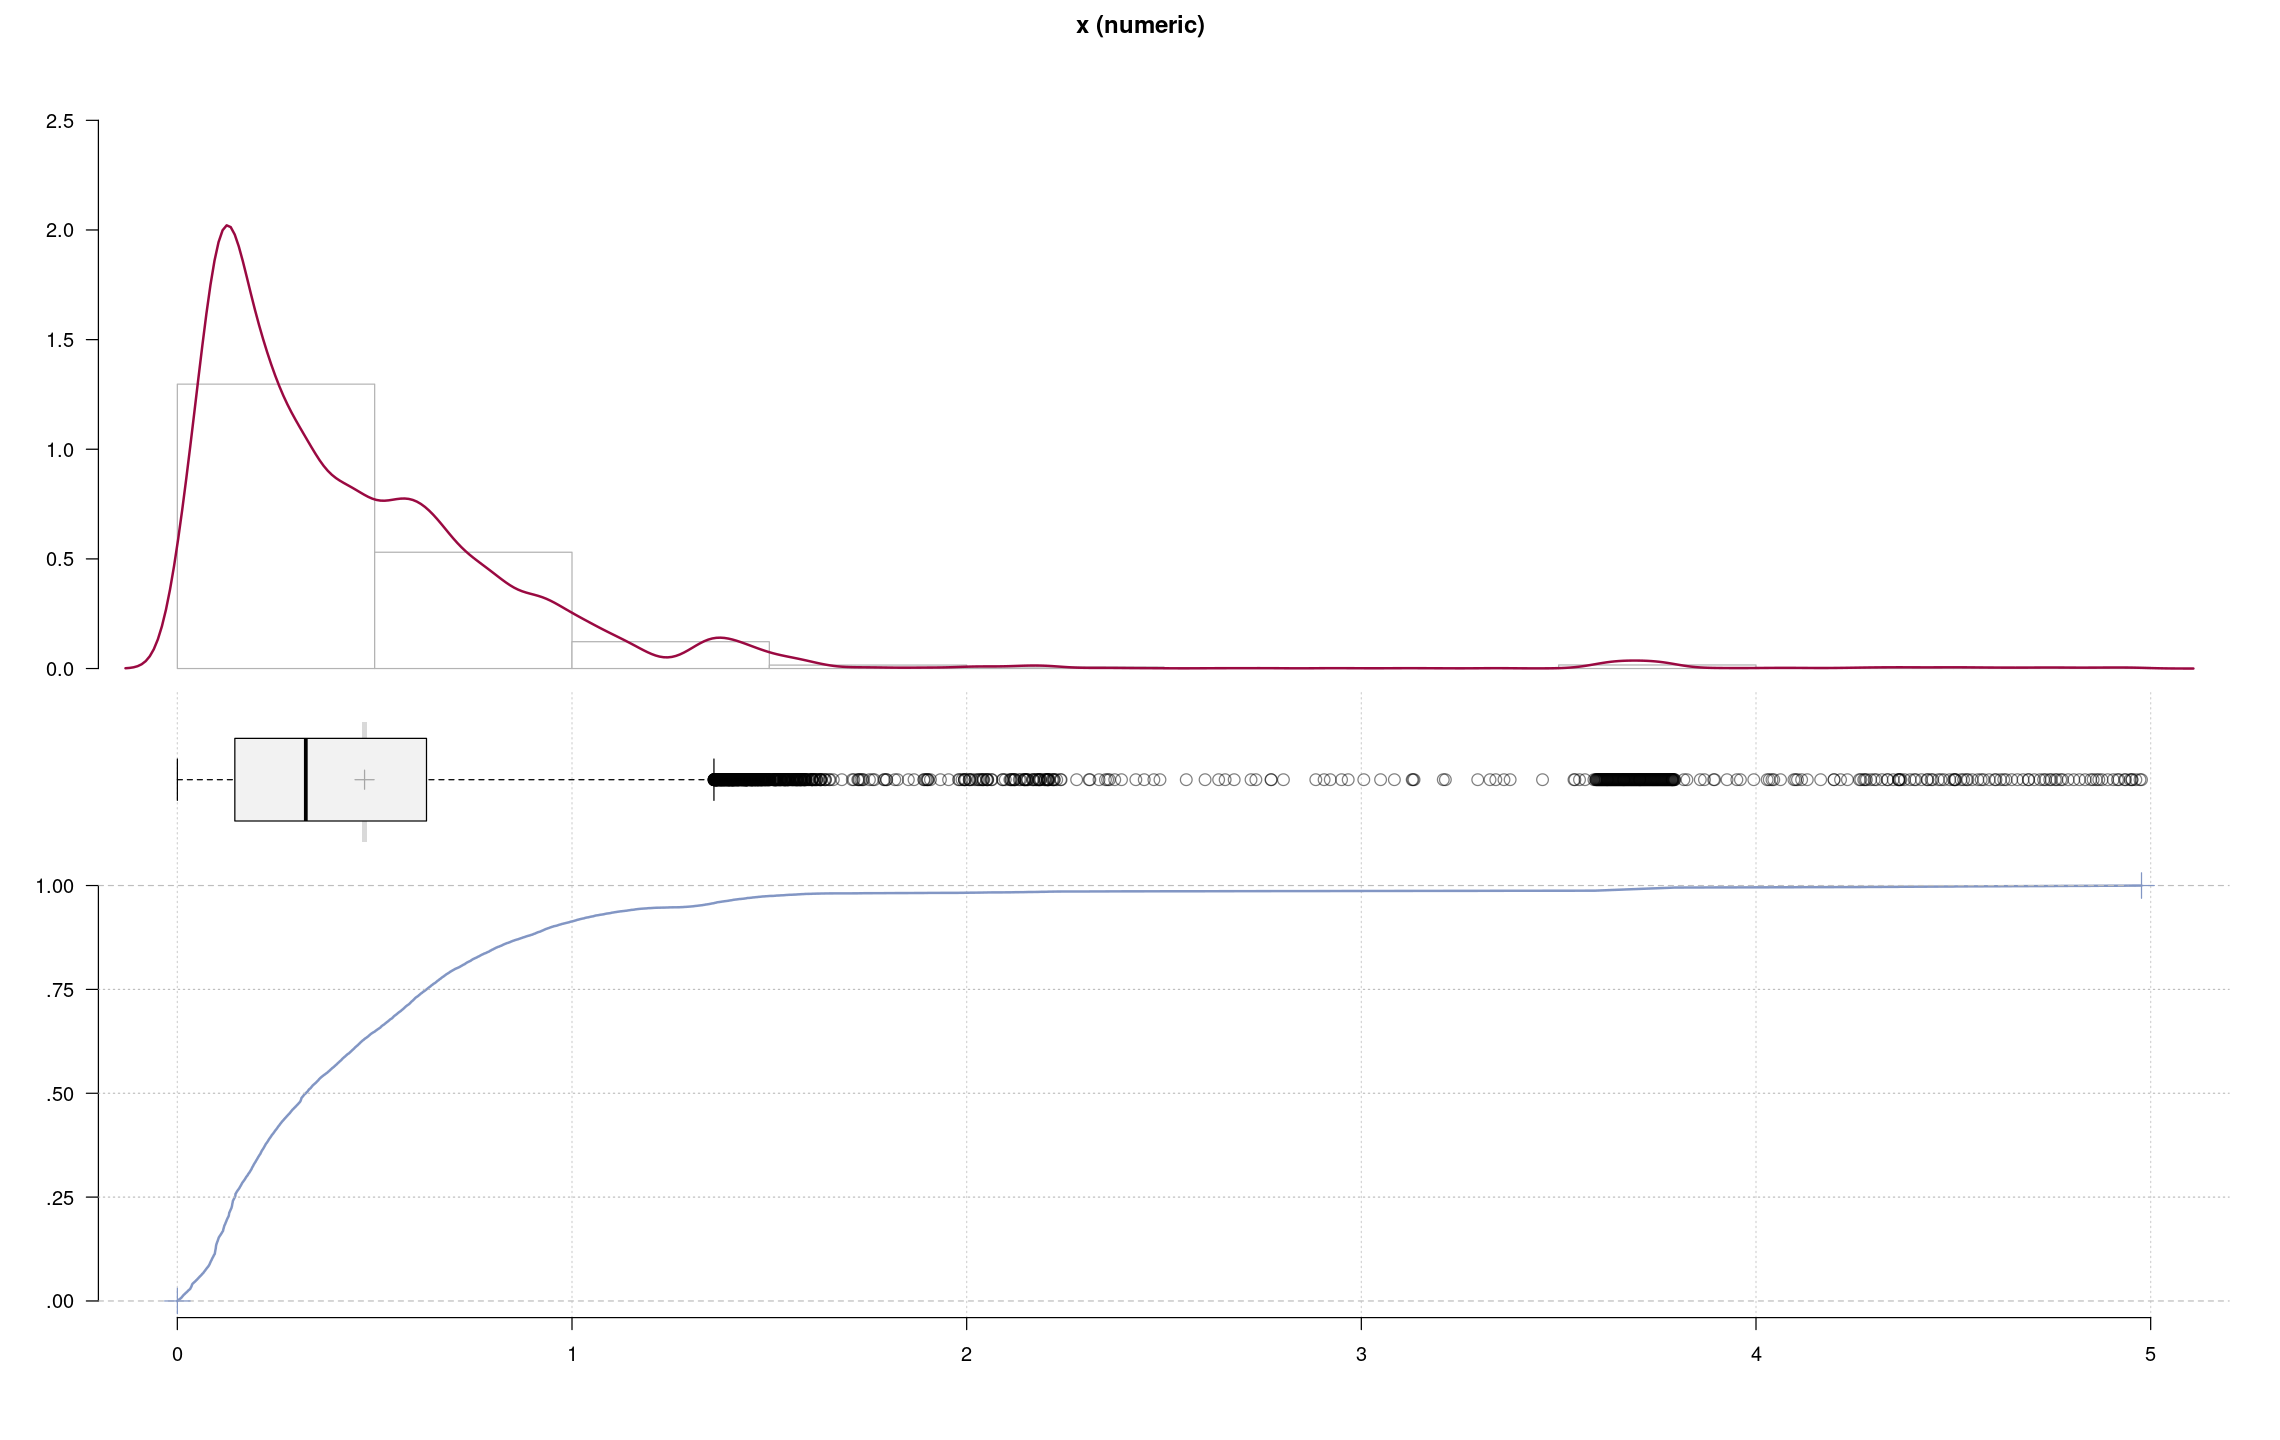

In [16]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

------------------------------------------------------------------------------ 
y (numeric)

         length              n            NAs         unique             0s'
         20'000         20'000              0         19'789              0
                        100.0%           0.0%                          0.0%
                                                                           
            .05            .10            .25         median            .75
  0.11548128054  0.13152881116  0.20315728709  0.39492657781  0.67451989651
                                                                           
          range             sd          vcoef            mad            IQR
  4.87989653647  0.55439467458  1.03859006864  0.32504503967  0.47136260942
                                                                           
           mean          meanCI
  0.53379547072   0.52611162869
                  0.54147931276
                               
            .90   

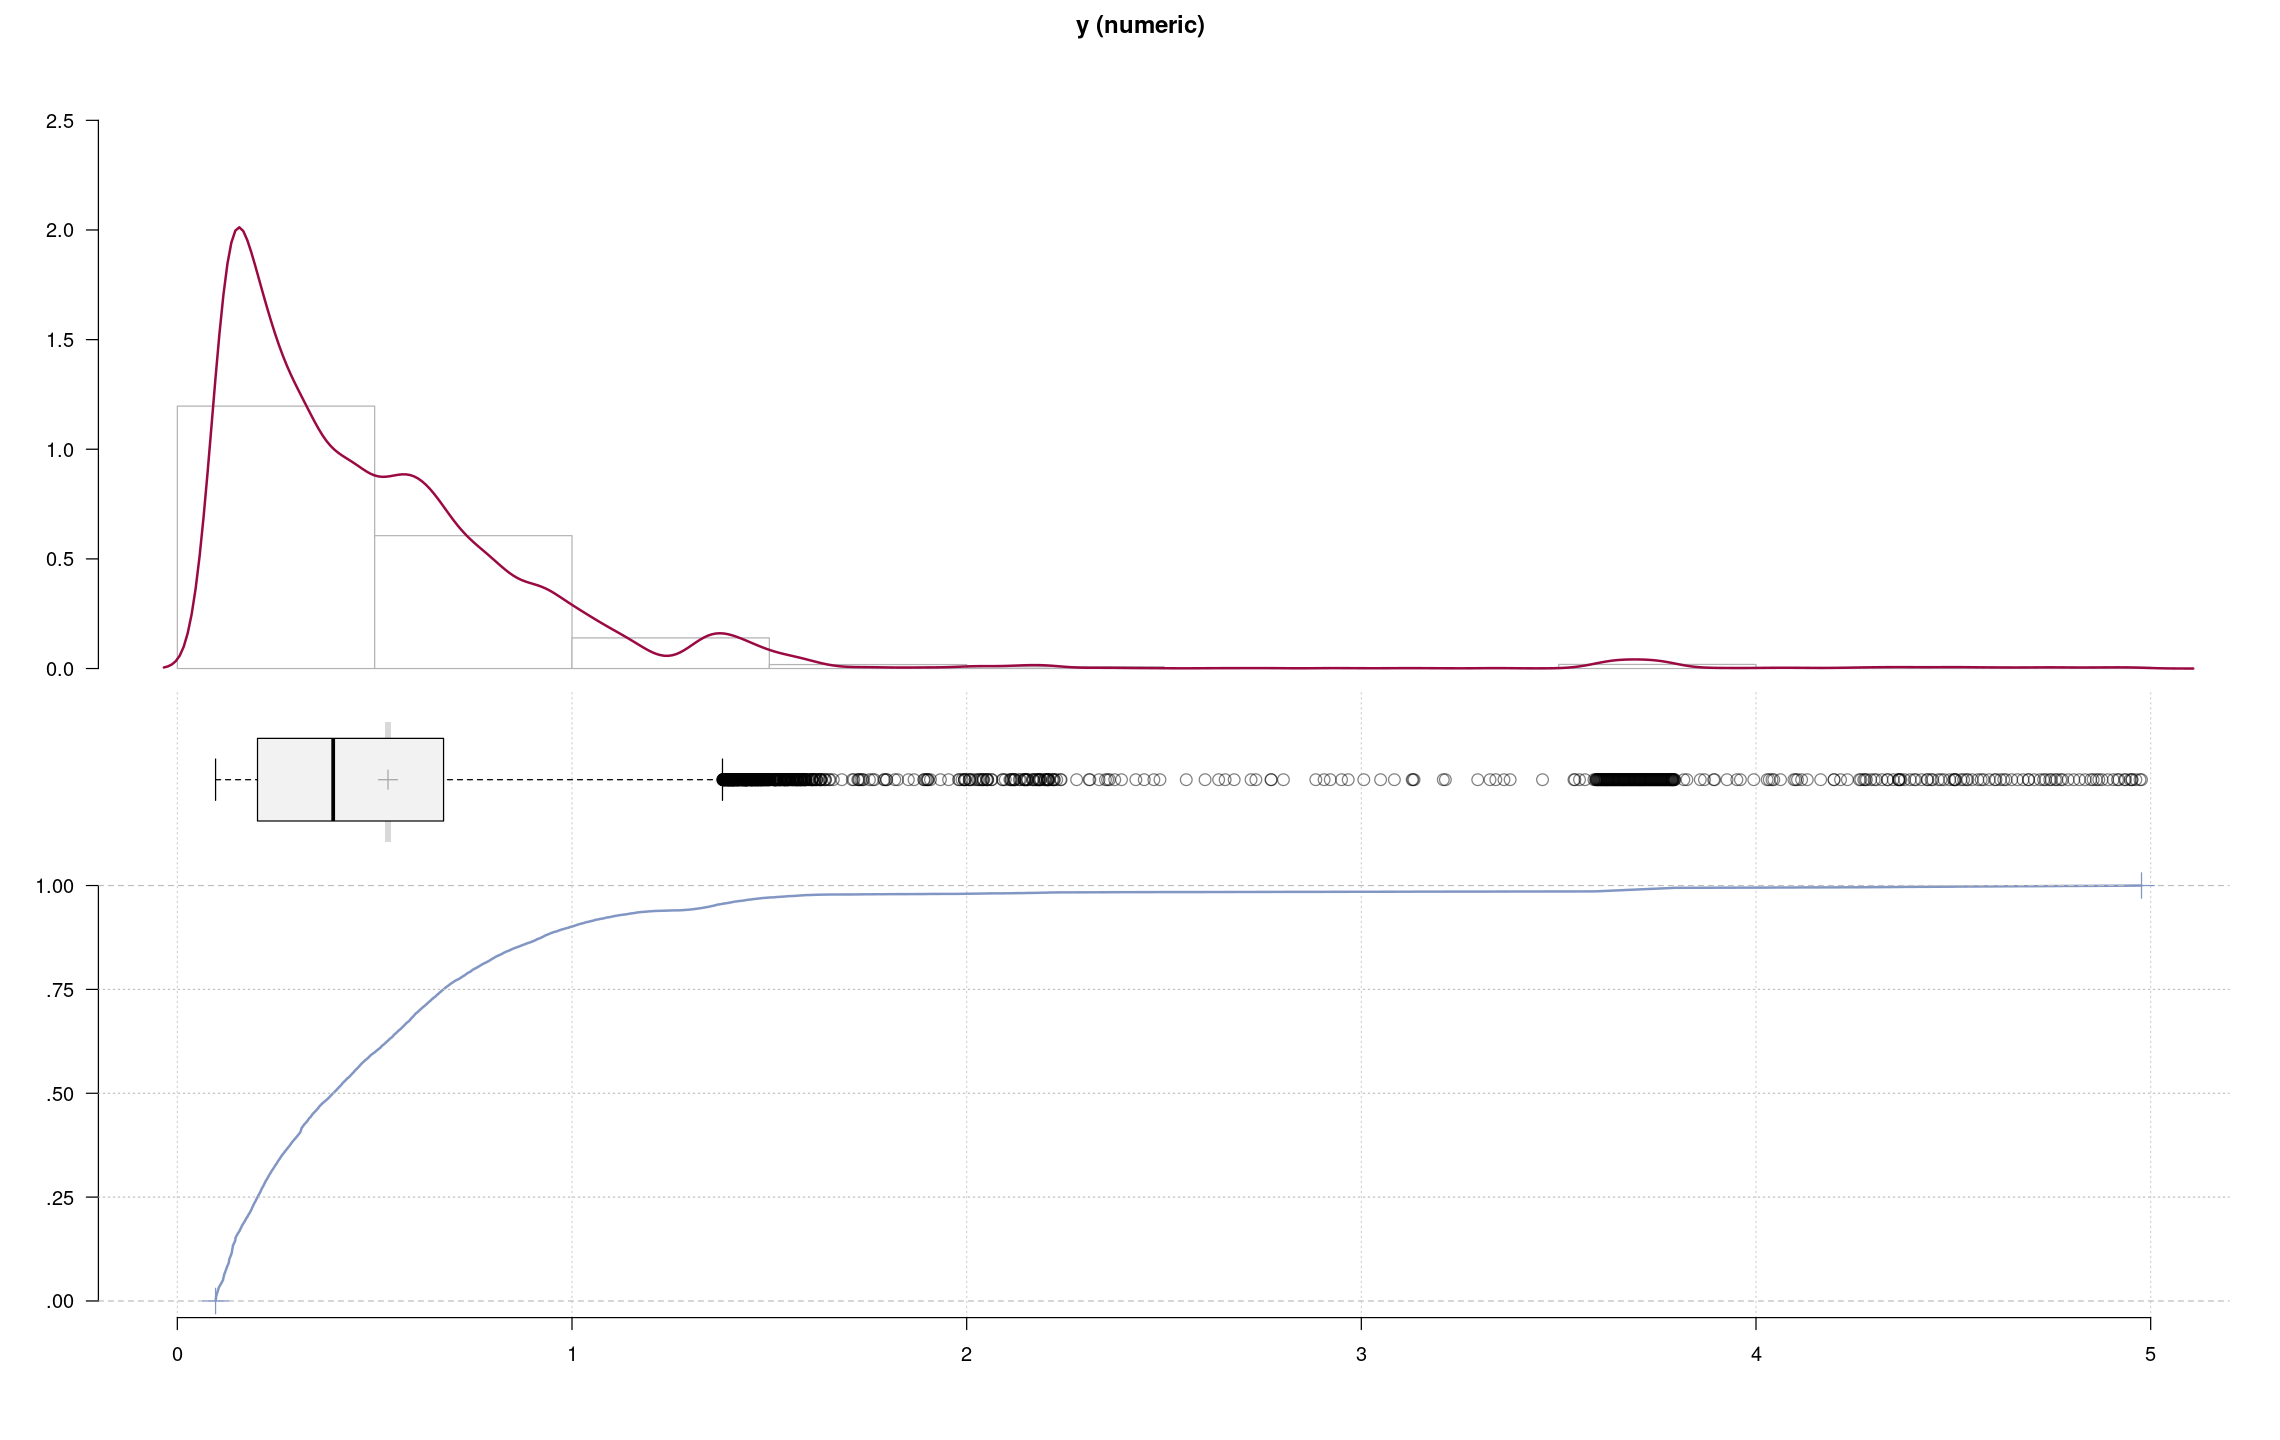

In [24]:
options(repr.plot.width=19, repr.plot.height=12)

nlargest <- 20000
y <- extract_nlargest_sample(x, n = nlargest)
Desc(y)

## Predictor variables

In [18]:
detection_vars <- names(data)[c(11:45)]

data_covariates_detection <- data %>% select(all_of(detection_vars))

tail(data_covariates_detection)

,name_airplane,name_bench,name_bench..group.,name_bicycle,name_bird,name_bird..group.,name_boat,name_bus,name_car,name_car..group.,⋯,name_street.light,name_tenement,name_traffic.light,name_traffic.sign,name_train,name_tree,name_tree..group.,name_truck,name_tunnel,name_tunnel.entrance
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
22841,0,0,0,0,0,0,0,0,3,1,⋯,3,1,1,2,0,0,0,0,0,0
22842,0,0,0,0,0,0,0,1,5,1,⋯,2,2,0,2,0,0,2,1,0,0
22843,0,0,0,0,0,0,0,1,4,0,⋯,5,0,0,5,0,0,2,0,0,0
22844,0,1,0,0,0,0,0,1,3,1,⋯,4,2,0,3,0,1,2,1,0,0
22845,0,1,0,0,0,0,0,0,5,0,⋯,3,2,0,5,0,1,1,0,0,0
22846,0,0,0,0,0,0,0,1,5,1,⋯,2,1,1,3,0,1,1,1,0,0


In [19]:
detection_vars_counts <- apply(data_covariates_detection, 2, sum)

names(detection_vars_counts) <- names(data_covariates_detection)

data.frame("total" = sort(detection_vars_counts, decreasing = TRUE))

,total
,<int>
name_car,138255
name_street.light,110629
name_traffic.sign,103556
name_tree,77977
name_tenement,53488
name_tree..group.,45694
name_traffic.light,44228
name_electric.pole,38739
name_fence,34236


In [20]:
# # select the predictor variables
# predictor_vars <- c("velocity", "object", "area", "horizontal_left", "horizontal_right", "vertical_down", "vertical_up", detection_vars)
# 
# data_covariates <- data %>% select(all_of(predictor_vars))
# 
# str(data_covariates)

In [21]:
# # Remove columns containing only zeros
# # data_covariates_clean <- data_covariates %>% select(where(~ sum(.) != 0))
# data_covariates_clean <- data_covariates %>% select_if(colSums(.) != 0)
# 
# str(data_covariates_clean)

In [22]:
# # scale all predictors variables
# 
# data_covariates_clean_scaled <- get_standard_scaled_data(data_covariates_clean, newdata = NULL)
# 
# str(data_covariates_clean_scaled)

In [23]:
data_covariates <- data_object$predictors

str(data_covariates)

'data.frame':	22846 obs. of  42 variables:
 $ velocity             : num  -0.546 -0.788 -0.809 -0.56 -0.743 ...
 $ object               : num  -1.211 -1.122 -0.586 -1.301 -0.764 ...
 $ area                 : num  -0.598 -0.288 -0.521 -0.894 -0.882 ...
 $ horizontal_left      : num  -1.66 -1.52 -1.66 -1.81 -1.81 ...
 $ horizontal_right     : num  -0.263 -0.263 0.654 -0.263 0.523 ...
 $ vertical_down        : num  -1.147 -1.049 -0.461 -1.245 -0.657 ...
 $ vertical_up          : num  -0.699 -0.699 -0.699 -0.699 -0.699 ...
 $ name_airplane        : num  -0.258 -0.258 -0.258 -0.258 -0.258 ...
 $ name_bench           : num  -0.233 -0.233 -0.233 -0.233 -0.233 ...
 $ name_bench..group.   : num  -0.0945 -0.0945 -0.0945 -0.0945 -0.0945 ...
 $ name_bicycle         : num  -0.268 -0.268 -0.268 -0.268 -0.268 ...
 $ name_bird            : num  -0.108 -0.108 -0.108 -0.108 -0.108 ...
 $ name_bird..group.    : num  -0.00936 -0.00936 -0.00936 -0.00936 -0.00936 ...
 $ name_boat            : num  -0.0684 -

# Model selection

## Candidate block sizes

In [25]:
z <- y

In [26]:
minimum_block_size <- find_minimum_block_size(x = z, threshold = min(z))

print(minimum_block_size)

[1] 3


In [27]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x = z, m = 50)

print(maximum_block_size)

[1] 400


In [28]:
maxima <- extract_block_maxima(x = z, block_size = minimum_block_size)

print(min(maxima))

[1] 0.09695527703


In [29]:
print(median(z))

[1] 0.3949265778


In [30]:
print(calculate_mode(z))

[1] 0.1570450047


In [31]:
candidate_block_sizes <- get_candidate_block_sizes(x = z, threshold = min(z), m = 50)

print(candidate_block_sizes)

  [1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
[145] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[163] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
[181] 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
[199] 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
[217] 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

## Hyperparameters

In [32]:
# use.phi <- TRUE
# nlargest <- 10000
# block_sizes <- NULL
# minimum_nblocks <- 50
# threshold <- min(x)
# confidence_level <- 0.95
# use_extremal_index <- TRUE
# use_uniform_prior <- TRUE
# method <- "MLE"

## Candidate models

In [33]:
models_object <- c(list("model_00" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~1),
                        
                        "model_01" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~object),
                        "model_02" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_03" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_04" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_05" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_06" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_07" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~object),
                        
                        "model_08" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~area),
                        "model_09" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_10" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_11" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_12" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_13" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_14" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~area),
                        
                        "model_15" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        "model_16" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_17" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_18" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_19" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_20" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_21" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_22" = list("location.fun" = ~horizontal_left, "scale.fun" = ~horizontal_left, "shape.fun" = ~horizontal_left),
                        "model_23" = list("location.fun" = ~horizontal_left, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_24" = list("location.fun" = ~1, "scale.fun" = ~horizontal_left, "shape.fun" = ~1),
                        "model_25" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~horizontal_left),
                        "model_26" = list("location.fun" = ~horizontal_left, "scale.fun" = ~horizontal_left, "shape.fun" = ~1),
                        "model_27" = list("location.fun" = ~horizontal_left, "scale.fun" = ~1, "shape.fun" = ~horizontal_left),
                        "model_28" = list("location.fun" = ~1, "scale.fun" = ~horizontal_left, "shape.fun" = ~horizontal_left),
                        
                        "model_29" = list("location.fun" = ~horizontal_right, "scale.fun" = ~horizontal_right, "shape.fun" = ~horizontal_right),
                        "model_30" = list("location.fun" = ~horizontal_right, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_31" = list("location.fun" = ~1, "scale.fun" = ~horizontal_right, "shape.fun" = ~1),
                        "model_32" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~horizontal_right),
                        "model_33" = list("location.fun" = ~horizontal_right, "scale.fun" = ~horizontal_right, "shape.fun" = ~1),
                        "model_34" = list("location.fun" = ~horizontal_right, "scale.fun" = ~1, "shape.fun" = ~horizontal_right),
                        "model_35" = list("location.fun" = ~1, "scale.fun" = ~horizontal_right, "shape.fun" = ~horizontal_right),
                        
                        "model_36" = list("location.fun" = ~vertical_up, "scale.fun" = ~vertical_up, "shape.fun" = ~vertical_up),
                        "model_37" = list("location.fun" = ~vertical_up, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_38" = list("location.fun" = ~1, "scale.fun" = ~vertical_up, "shape.fun" = ~1),
                        "model_39" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~vertical_up),
                        "model_40" = list("location.fun" = ~vertical_up, "scale.fun" = ~vertical_up, "shape.fun" = ~1),
                        "model_41" = list("location.fun" = ~vertical_up, "scale.fun" = ~1, "shape.fun" = ~vertical_up),
                        "model_42" = list("location.fun" = ~1, "scale.fun" = ~vertical_up, "shape.fun" = ~vertical_up),
                        
                        "model_43" = list("location.fun" = ~vertical_down, "scale.fun" = ~vertical_down, "shape.fun" = ~vertical_down),
                        "model_44" = list("location.fun" = ~vertical_down, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_45" = list("location.fun" = ~1, "scale.fun" = ~vertical_down, "shape.fun" = ~1),
                        "model_46" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~vertical_down),
                        "model_47" = list("location.fun" = ~vertical_down, "scale.fun" = ~vertical_down, "shape.fun" = ~1),
                        "model_48" = list("location.fun" = ~vertical_down, "scale.fun" = ~1, "shape.fun" = ~vertical_down),
                        "model_49" = list("location.fun" = ~1, "scale.fun" = ~vertical_down, "shape.fun" = ~vertical_down),
                        
                        "model_50" = list("location.fun" = ~name_car, "scale.fun" = ~name_car, "shape.fun" = ~name_car),
                        "model_51" = list("location.fun" = ~name_car, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_52" = list("location.fun" = ~1, "scale.fun" = ~name_car, "shape.fun" = ~1),
                        "model_53" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_car),
                        "model_54" = list("location.fun" = ~name_car, "scale.fun" = ~name_car, "shape.fun" = ~1),
                        "model_55" = list("location.fun" = ~name_car, "scale.fun" = ~1, "shape.fun" = ~name_car),
                        "model_56" = list("location.fun" = ~1, "scale.fun" = ~name_car, "shape.fun" = ~name_car),
                        
                        "model_57" = list("location.fun" = ~name_street.light, "scale.fun" = ~name_street.light, "shape.fun" = ~name_street.light),
                        "model_58" = list("location.fun" = ~name_street.light, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_59" = list("location.fun" = ~1, "scale.fun" = ~name_street.light, "shape.fun" = ~1),
                        "model_60" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_street.light),
                        "model_61" = list("location.fun" = ~name_street.light, "scale.fun" = ~name_street.light, "shape.fun" = ~1),
                        "model_62" = list("location.fun" = ~name_street.light, "scale.fun" = ~1, "shape.fun" = ~name_street.light),
                        "model_63" = list("location.fun" = ~1, "scale.fun" = ~name_street.light, "shape.fun" = ~name_street.light),
                        
                        "model_64" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~name_traffic.sign),
                        "model_65" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_66" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~1),
                        "model_67" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_traffic.sign),
                        "model_68" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~1),
                        "model_69" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~1, "shape.fun" = ~name_traffic.sign),
                        "model_70" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~name_traffic.sign),
                        
                        "model_71" = list("location.fun" = ~name_tree, "scale.fun" = ~name_tree, "shape.fun" = ~name_tree),
                        "model_72" = list("location.fun" = ~name_tree, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_73" = list("location.fun" = ~1, "scale.fun" = ~name_tree, "shape.fun" = ~1),
                        "model_74" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tree),
                        "model_75" = list("location.fun" = ~name_tree, "scale.fun" = ~name_tree, "shape.fun" = ~1),
                        "model_76" = list("location.fun" = ~name_tree, "scale.fun" = ~1, "shape.fun" = ~name_tree),
                        "model_77" = list("location.fun" = ~1, "scale.fun" = ~name_tree, "shape.fun" = ~name_tree),
                        
                        "model_78" = list("location.fun" = ~name_tenement, "scale.fun" = ~name_tenement, "shape.fun" = ~name_tenement),
                        "model_79" = list("location.fun" = ~name_tenement, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_80" = list("location.fun" = ~1, "scale.fun" = ~name_tenement, "shape.fun" = ~1),
                        "model_81" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tenement),
                        "model_82" = list("location.fun" = ~name_tenement, "scale.fun" = ~name_tenement, "shape.fun" = ~1),
                        "model_83" = list("location.fun" = ~name_tenement, "scale.fun" = ~1, "shape.fun" = ~name_tenement),
                        "model_84" = list("location.fun" = ~1, "scale.fun" = ~name_tenement, "shape.fun" = ~name_tenement),
                        
                        "model_85" = list("location.fun" = ~name_tree..group., "scale.fun" = ~name_tree..group., "shape.fun" = ~name_tree..group.),
                        "model_86" = list("location.fun" = ~name_tree..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_87" = list("location.fun" = ~1, "scale.fun" = ~name_tree..group., "shape.fun" = ~1),
                        "model_88" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tree..group.),
                        "model_89" = list("location.fun" = ~name_tree..group., "scale.fun" = ~name_tree..group., "shape.fun" = ~1),
                        "model_90" = list("location.fun" = ~name_tree..group., "scale.fun" = ~1, "shape.fun" = ~name_tree..group.),
                        "model_91" = list("location.fun" = ~1, "scale.fun" = ~name_tree..group., "shape.fun" = ~name_tree..group.),
                        
                        "model_92" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~name_traffic.light, "shape.fun" = ~name_traffic.light),
                        "model_93" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_94" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.light, "shape.fun" = ~1),
                        "model_95" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_traffic.light),
                        "model_96" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~name_traffic.light, "shape.fun" = ~1),
                        "model_97" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~1, "shape.fun" = ~name_traffic.light),
                        "model_98" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.light, "shape.fun" = ~name_traffic.light),
                        
                        "model_99" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~name_electric.pole, "shape.fun" = ~name_electric.pole),
                        "model_100" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_101" = list("location.fun" = ~1, "scale.fun" = ~name_electric.pole, "shape.fun" = ~1),
                        "model_102" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_electric.pole),
                        "model_103" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~name_electric.pole, "shape.fun" = ~1),
                        "model_104" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~1, "shape.fun" = ~name_electric.pole),
                        "model_105" = list("location.fun" = ~1, "scale.fun" = ~name_electric.pole, "shape.fun" = ~name_electric.pole),
                        
                        "model_106" = list("location.fun" = ~name_fence, "scale.fun" = ~name_fence, "shape.fun" = ~name_fence),
                        "model_107" = list("location.fun" = ~name_fence, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_108" = list("location.fun" = ~1, "scale.fun" = ~name_fence, "shape.fun" = ~1),
                        "model_109" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_fence),
                        "model_110" = list("location.fun" = ~name_fence, "scale.fun" = ~name_fence, "shape.fun" = ~1),
                        "model_111" = list("location.fun" = ~name_fence, "scale.fun" = ~1, "shape.fun" = ~name_fence),
                        "model_112" = list("location.fun" = ~1, "scale.fun" = ~name_fence, "shape.fun" = ~name_fence),
                        
                        "model_113" = list("location.fun" = ~name_person, "scale.fun" = ~name_person, "shape.fun" = ~name_person),
                        "model_114" = list("location.fun" = ~name_person, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_115" = list("location.fun" = ~1, "scale.fun" = ~name_person, "shape.fun" = ~1),
                        "model_116" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_person),
                        "model_117" = list("location.fun" = ~name_person, "scale.fun" = ~name_person, "shape.fun" = ~1),
                        "model_118" = list("location.fun" = ~name_person, "scale.fun" = ~1, "shape.fun" = ~name_person),
                        "model_119" = list("location.fun" = ~1, "scale.fun" = ~name_person, "shape.fun" = ~name_person),
                        
                        "model_120" = list("location.fun" = ~name_truck, "scale.fun" = ~name_truck, "shape.fun" = ~name_truck),
                        "model_121" = list("location.fun" = ~name_truck, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_122" = list("location.fun" = ~1, "scale.fun" = ~name_truck, "shape.fun" = ~1),
                        "model_123" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_truck),
                        "model_124" = list("location.fun" = ~name_truck, "scale.fun" = ~name_truck, "shape.fun" = ~1),
                        "model_125" = list("location.fun" = ~name_truck, "scale.fun" = ~1, "shape.fun" = ~name_truck),
                        "model_126" = list("location.fun" = ~1, "scale.fun" = ~name_truck, "shape.fun" = ~name_truck),
                        
                        "model_127" = list("location.fun" = ~name_car..group., "scale.fun" = ~name_car..group., "shape.fun" = ~name_car..group.),
                        "model_128" = list("location.fun" = ~name_car..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_129" = list("location.fun" = ~1, "scale.fun" = ~name_car..group., "shape.fun" = ~1),
                        "model_130" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_car..group.),
                        "model_131" = list("location.fun" = ~name_car..group., "scale.fun" = ~name_car..group., "shape.fun" = ~1),
                        "model_132" = list("location.fun" = ~name_car..group., "scale.fun" = ~1, "shape.fun" = ~name_car..group.),
                        "model_133" = list("location.fun" = ~1, "scale.fun" = ~name_car..group., "shape.fun" = ~name_car..group.),
                        
                        "model_134" = list("location.fun" = ~name_house..group., "scale.fun" = ~name_house..group., "shape.fun" = ~name_house..group.),
                        "model_135" = list("location.fun" = ~name_house..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_136" = list("location.fun" = ~1, "scale.fun" = ~name_house..group., "shape.fun" = ~1),
                        "model_137" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_house..group.),
                        "model_138" = list("location.fun" = ~name_house..group., "scale.fun" = ~name_house..group., "shape.fun" = ~1),
                        "model_139" = list("location.fun" = ~name_house..group., "scale.fun" = ~1, "shape.fun" = ~name_house..group.),
                        "model_140" = list("location.fun" = ~1, "scale.fun" = ~name_house..group., "shape.fun" = ~name_house..group.),
                        
                        "model_141" = list("location.fun" = ~name_house, "scale.fun" = ~name_house, "shape.fun" = ~name_house),
                        "model_142" = list("location.fun" = ~name_house, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_143" = list("location.fun" = ~1, "scale.fun" = ~name_house, "shape.fun" = ~1),
                        "model_144" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_house),
                        "model_145" = list("location.fun" = ~name_house, "scale.fun" = ~name_house, "shape.fun" = ~1),
                        "model_146" = list("location.fun" = ~name_house, "scale.fun" = ~1, "shape.fun" = ~name_house),
                        "model_147" = list("location.fun" = ~1, "scale.fun" = ~name_house, "shape.fun" = ~name_house),
                        
                        "model_148" = list("location.fun" = ~name_bus, "scale.fun" = ~name_bus, "shape.fun" = ~name_bus),
                        "model_149" = list("location.fun" = ~name_bus, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_150" = list("location.fun" = ~1, "scale.fun" = ~name_bus, "shape.fun" = ~1),
                        "model_151" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_bus),
                        "model_152" = list("location.fun" = ~name_bus, "scale.fun" = ~name_bus, "shape.fun" = ~1),
                        "model_153" = list("location.fun" = ~name_bus, "scale.fun" = ~1, "shape.fun" = ~name_bus),
                        "model_154" = list("location.fun" = ~1, "scale.fun" = ~name_bus, "shape.fun" = ~name_bus),
                        
                        "model_155" = list("location.fun" = ~name_special.building, "scale.fun" = ~name_special.building, "shape.fun" = ~name_special.building),
                        "model_156" = list("location.fun" = ~name_special.building, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_157" = list("location.fun" = ~1, "scale.fun" = ~name_special.building, "shape.fun" = ~1),
                        "model_158" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_special.building),
                        "model_159" = list("location.fun" = ~name_special.building, "scale.fun" = ~name_special.building, "shape.fun" = ~1),
                        "model_160" = list("location.fun" = ~name_special.building, "scale.fun" = ~1, "shape.fun" = ~name_special.building),
                        "model_161" = list("location.fun" = ~1, "scale.fun" = ~name_special.building, "shape.fun" = ~name_special.building)))


## Estimations

In [34]:
# defaultW <- getOption("warn") 
# 
# options(warn = -1) 
# 
# 
# fitted_models_object <- lapply(models_object, function(model){
#   try({
#     ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x = x,
#                                                                         data = data_covariates_clean_scaled,
#                                                                         location.fun = model$location.fun,
#                                                                         scale.fun = model$scale.fun,
#                                                                         shape.fun = model$shape.fun,
#                                                                         use.phi = use.phi,
#                                                                         nlargest = nlargest,
#                                                                         block_sizes = block_sizes,
#                                                                         minimum_nblocks = minimum_nblocks,
#                                                                         threshold = threshold,
#                                                                         confidence_level = confidence_level,
#                                                                         use_extremal_index = use_extremal_index,
#                                                                         use_uniform_prior = use_uniform_prior,
#                                                                         method = method)
#     
#     model_vector <- as.character(model)
#     names(model_vector) <- c("location.fun", "scale.fun", "shape.fun")
#     
#     information_criteria <- ns_gev_mixture_model_object$information_criteria
#     
#     c(model_vector, information_criteria)
#   },
#   silent = TRUE)
#   
# })
# 
# 
# options(warn = defaultW)

In [35]:
# success <- sapply(fitted_models_object, function(x) !inherits(x, "try-error"))
# 
# success

In [36]:
# table(success)

In [37]:
# fitted_models_object_success <- fitted_models_object[success]
# 
# fitted_models_object_success_df <- do.call(rbind, fitted_models_object_success)
# 
# fitted_models_object_success_df <- data.frame("model_names" = rownames(fitted_models_object_success_df),
#                                               fitted_models_object_success_df)
# 
# rownames(fitted_models_object_success_df) <- 1:nrow(fitted_models_object_success_df)
# 
# fitted_models_object_success_df

In [38]:
# write.csv(x = fitted_models_object_success_df, file = "./fitted_models_information.csv", row.names = FALSE)

# Best model

## Identification

In [119]:
aic_path <- "./04_experimentation_01/longitudinal_error model_aic.csv"

fitted_models_information <- xfun::in_dir(dir = path, expr = read_data(aic_path))

In [86]:
rank <- order(fitted_models_information$AIC)

fitted_models_information_sorted <- fitted_models_information %>% slice(rank)

fitted_models_information_sorted

model_names,location.fun,scale.fun,shape.fun,AIC,BIC,variable
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
model_01,~horizontal_right,~horizontal_right,~horizontal_right,-28762.03620,-26245.62741,horizontal_right
model_01,~object,~object,~object,-27645.34773,-25179.41132,object
model_04,~1,~1,~name_street.light,-27336.50302,-25865.59359,name_street.light
model_07,~1,~name_traffic.sign,~name_traffic.sign,-27169.59896,-25186.75536,name_traffic.sign
model_01,~name_tree,~name_tree,~name_tree,-27004.38346,-23781.36131,name_tree
model_06,~horizontal_right,~1,~horizontal_right,-27001.70290,-25062.12134,horizontal_right
model_01,~name_traffic.sign,~name_traffic.sign,~name_traffic.sign,-26994.43635,-24377.08280,name_traffic.sign
model_06,~name_traffic.sign,~1,~name_traffic.sign,-26852.34862,-24912.76706,name_traffic.sign
model_05,~name_traffic.sign,~name_traffic.sign,~1,-26695.27021,-24885.47478,name_traffic.sign


In [87]:
model_position <- which(fitted_models_information_sorted$model_names == "model_01" &
                        fitted_models_information_sorted$variable == "object")

selected_model <- fitted_models_information_sorted |> slice(model_position)

selected_model

model_names,location.fun,scale.fun,shape.fun,AIC,BIC,variable
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
model_01,~object,~object,~object,-27645.34773,-25179.41132,object


In [88]:
selected_model_variable <- selected_model$variable

selected_model_variable

[1] "object"

## Estimation

In [161]:
use.phi <- TRUE
nlargest <- 20000
block_sizes <- NULL
minimum_nblocks <- 50
threshold <- min(x)
confidence_level <- 0.95
use_extremal_index <- TRUE
use_uniform_prior <- TRUE
method <- "MLE"

In [162]:
defaultW <- getOption("warn") 

options(warn = -1) 

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x = x,
                                                                    data = data_covariates,
                                                                    location.fun = as.formula(selected_model$location.fun),
                                                                    scale.fun = as.formula(selected_model$scale.fun),
                                                                    shape.fun = as.formula(selected_model$shape.fun),
                                                                    use.phi = use.phi,
                                                                    nlargest = nlargest,
                                                                    block_sizes = block_sizes,
                                                                    minimum_nblocks = minimum_nblocks,
                                                                    threshold = threshold,
                                                                    confidence_level = confidence_level,
                                                                    use_extremal_index = use_extremal_index,
                                                                    use_uniform_prior = use_uniform_prior,
                                                                    method = method)

options(warn = defaultW)

In [163]:
print(names(ns_gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "selected_ns_gev_coefficients"         
[16] "unnormalized_gev_parameters_object"   
[17] "normalized_gev_parameters_object"     
[18] "full_normalized_gev_parameters_object"
[19] "selected_model_per_obs"               
[20] "all_data_covariates"                  
[21] "partial_data_covariates"              
[22] "partial_data"                         
[23] "all_

In [164]:
ns_gev_mixture_model_object$selected_ns_gev_coefficients

,mu0,mu1,phi0,phi1,xi0,xi1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.1093480775,-0.01807665299,-2.422690992,-0.17442736777,0.47647076957,0.19490707588
15,0.1221067216,-0.02004197961,-2.375387326,-0.17619371625,0.45508937456,0.20997420299
27,0.1314694164,-0.02250242585,-2.330475591,-0.18815858629,0.42714308920,0.23604706264
101,0.1779991315,-0.03710850342,-2.140006273,-0.17262725381,0.26772543742,0.22243073766
105,0.1855279504,-0.03590656575,-2.080480679,-0.21973374644,0.18042165375,0.18672684562
112,0.1843736692,-0.03377107505,-2.107401994,-0.18750257225,0.22014102818,0.19273590925
115,0.1847020911,-0.03494850807,-2.101266832,-0.11102330449,0.26443833665,0.19268010152
117,0.1855984607,-0.04258252500,-2.111498477,-0.19154775258,0.25518734379,0.25167124598
125,0.1900544919,-0.03133988346,-2.059386808,-0.11222390485,0.24214453025,0.16805249614


In [165]:
data.frame("weights" = ns_gev_mixture_model_object$weights)

,weights
,<dbl>
2,4.365428886e-01
15,3.503152838e-04
27,3.503152838e-04
101,9.508557702e-04
105,4.203783405e-03
112,1.211089981e-02
115,3.513161846e-02
117,3.903513162e-02
125,1.181062957e-02


In [166]:
highest_weighted_model <- which.max(ns_gev_mixture_model_object$weights)

highest_weighted_model

2 
1

In [167]:
model_quality <- round(ns_gev_mixture_model_object$information_criteria, 3)

model_quality

AIC        BIC 
-18030.913 -13557.539

## Diagnostic

In [168]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = 0,
                                          zoom_threshold = NULL,
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(p, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(p, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(p, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(p, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(p, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warni

ERROR: Error in if (A != B) {: missing value where TRUE/FALSE needed


In [155]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = which.max(ns_gev_mixture_model_object$weights),
                                          zoom_threshold = NULL,
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(p, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(p, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(p, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(p, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(p, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(p, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warni

ERROR: Error in if (A != B) {: missing value where TRUE/FALSE needed


# Quantiles

## Quantile order: alpha = n^(-1)

In [156]:
n <- length(x)

alpha <- n^(-1)

print(alpha)

[1] 4.377133853e-05


## Quantiles vs covariates

In [157]:
partial_data_covariates <- ns_gev_mixture_model_object$partial_data_covariates

partial_data_covariates_variable <- partial_data_covariates |> select(all_of(selected_model_variable))

partial_data_covariates_variable

object
<dbl>
-0.674995369
-0.585592890
-0.585592890
-0.496190411
-0.317385453
-0.674995369
-0.406787932
-0.674995369
-0.496190411


In [158]:
range(partial_data_covariates_variable)

[1] -2.910057344  3.437518665

In [159]:
variable_values <- seq(from = min(partial_data_covariates_variable),
                       to = max(partial_data_covariates_variable),
                       length.out = 100)

new_covariates_values <- data.frame(variable_values)

names(new_covariates_values) <- selected_model_variable

new_covariates_values

object
<dbl>
-2.910057344
-2.845940415
-2.781823485
-2.717706556
-2.653589627
-2.589472697
-2.525355768
-2.461238838
-2.397121909


In [59]:
# quantiles_new_covariates_values <- sapply(1:nrow(new_covariates_values), function(index){
#   covariates_values <- dplyr::slice(new_covariates_values, index)
#   
#   results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
#                                                                           alpha = alpha,
#                                                                           data = covariates_values,
#                                                                           do.ci = FALSE,
#                                                                           confidence_level = 0.95,
#                                                                           kind = c("geometric", "arithmetic", "harmonic")[1],
#                                                                           iterations = 10)
#   
#   results_geometric$covariates_1$gev_mixture_model_quantile
# })

In [160]:
quantiles_new_covariates_values_list <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                                           alpha = alpha,
                                                                                           data = new_covariates_values,
                                                                                           do.ci = FALSE,
                                                                                           confidence_level = 0.95,
                                                                                           kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                                           iterations = 20)

quantiles_new_covariates_values <- sapply(quantiles_new_covariates_values_list, function(quantile){
  c("lower_bound" = quantile$smalest_lower_ci_bound, 
    "estimate" = quantile$gev_mixture_model_quantile, 
    "upper_bound" = quantile$largest_upper_ci_bound)
})

quantiles_new_covariates_values <- data.frame(t(quantiles_new_covariates_values))

quantiles_new_covariates_values

ERROR: Error in na.fail.default(x): missing values in object


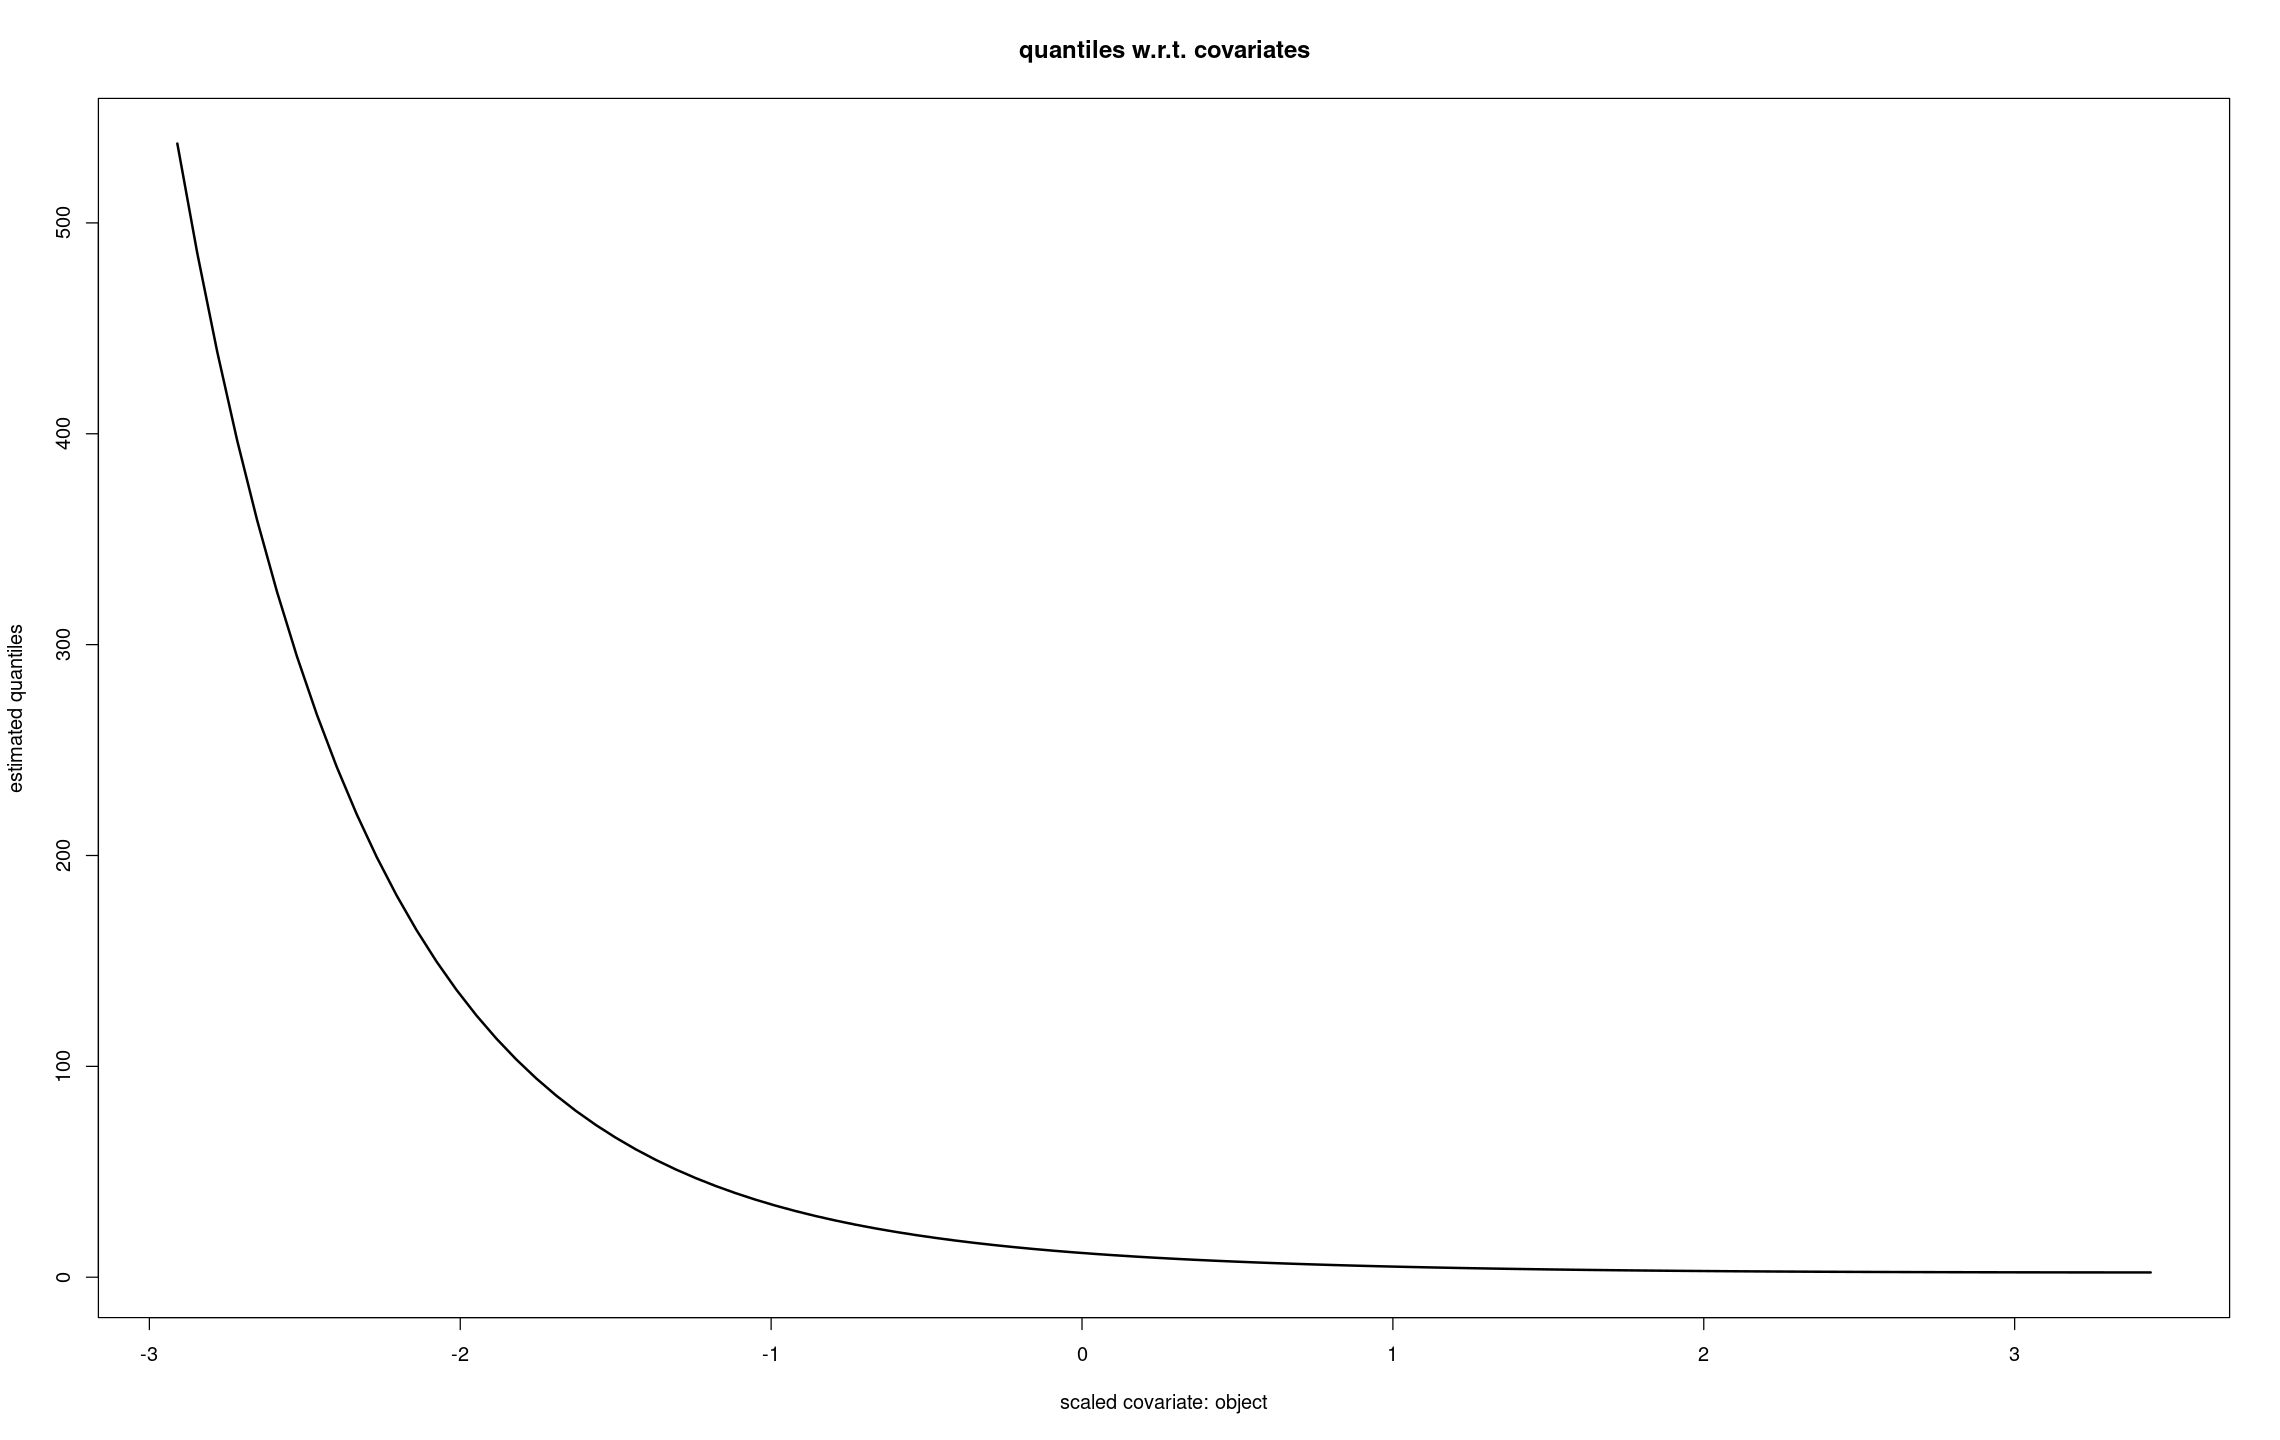

In [134]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = new_covariates_values[, selected_model_variable], 
        y = quantiles_new_covariates_values$estimate,
        type = "l",
        lty = 1,
        lwd = 2,
        main = "quantiles w.r.t. covariates",
        xlab = paste("scaled covariate:", selected_model_variable),
        ylab = "estimated quantiles")


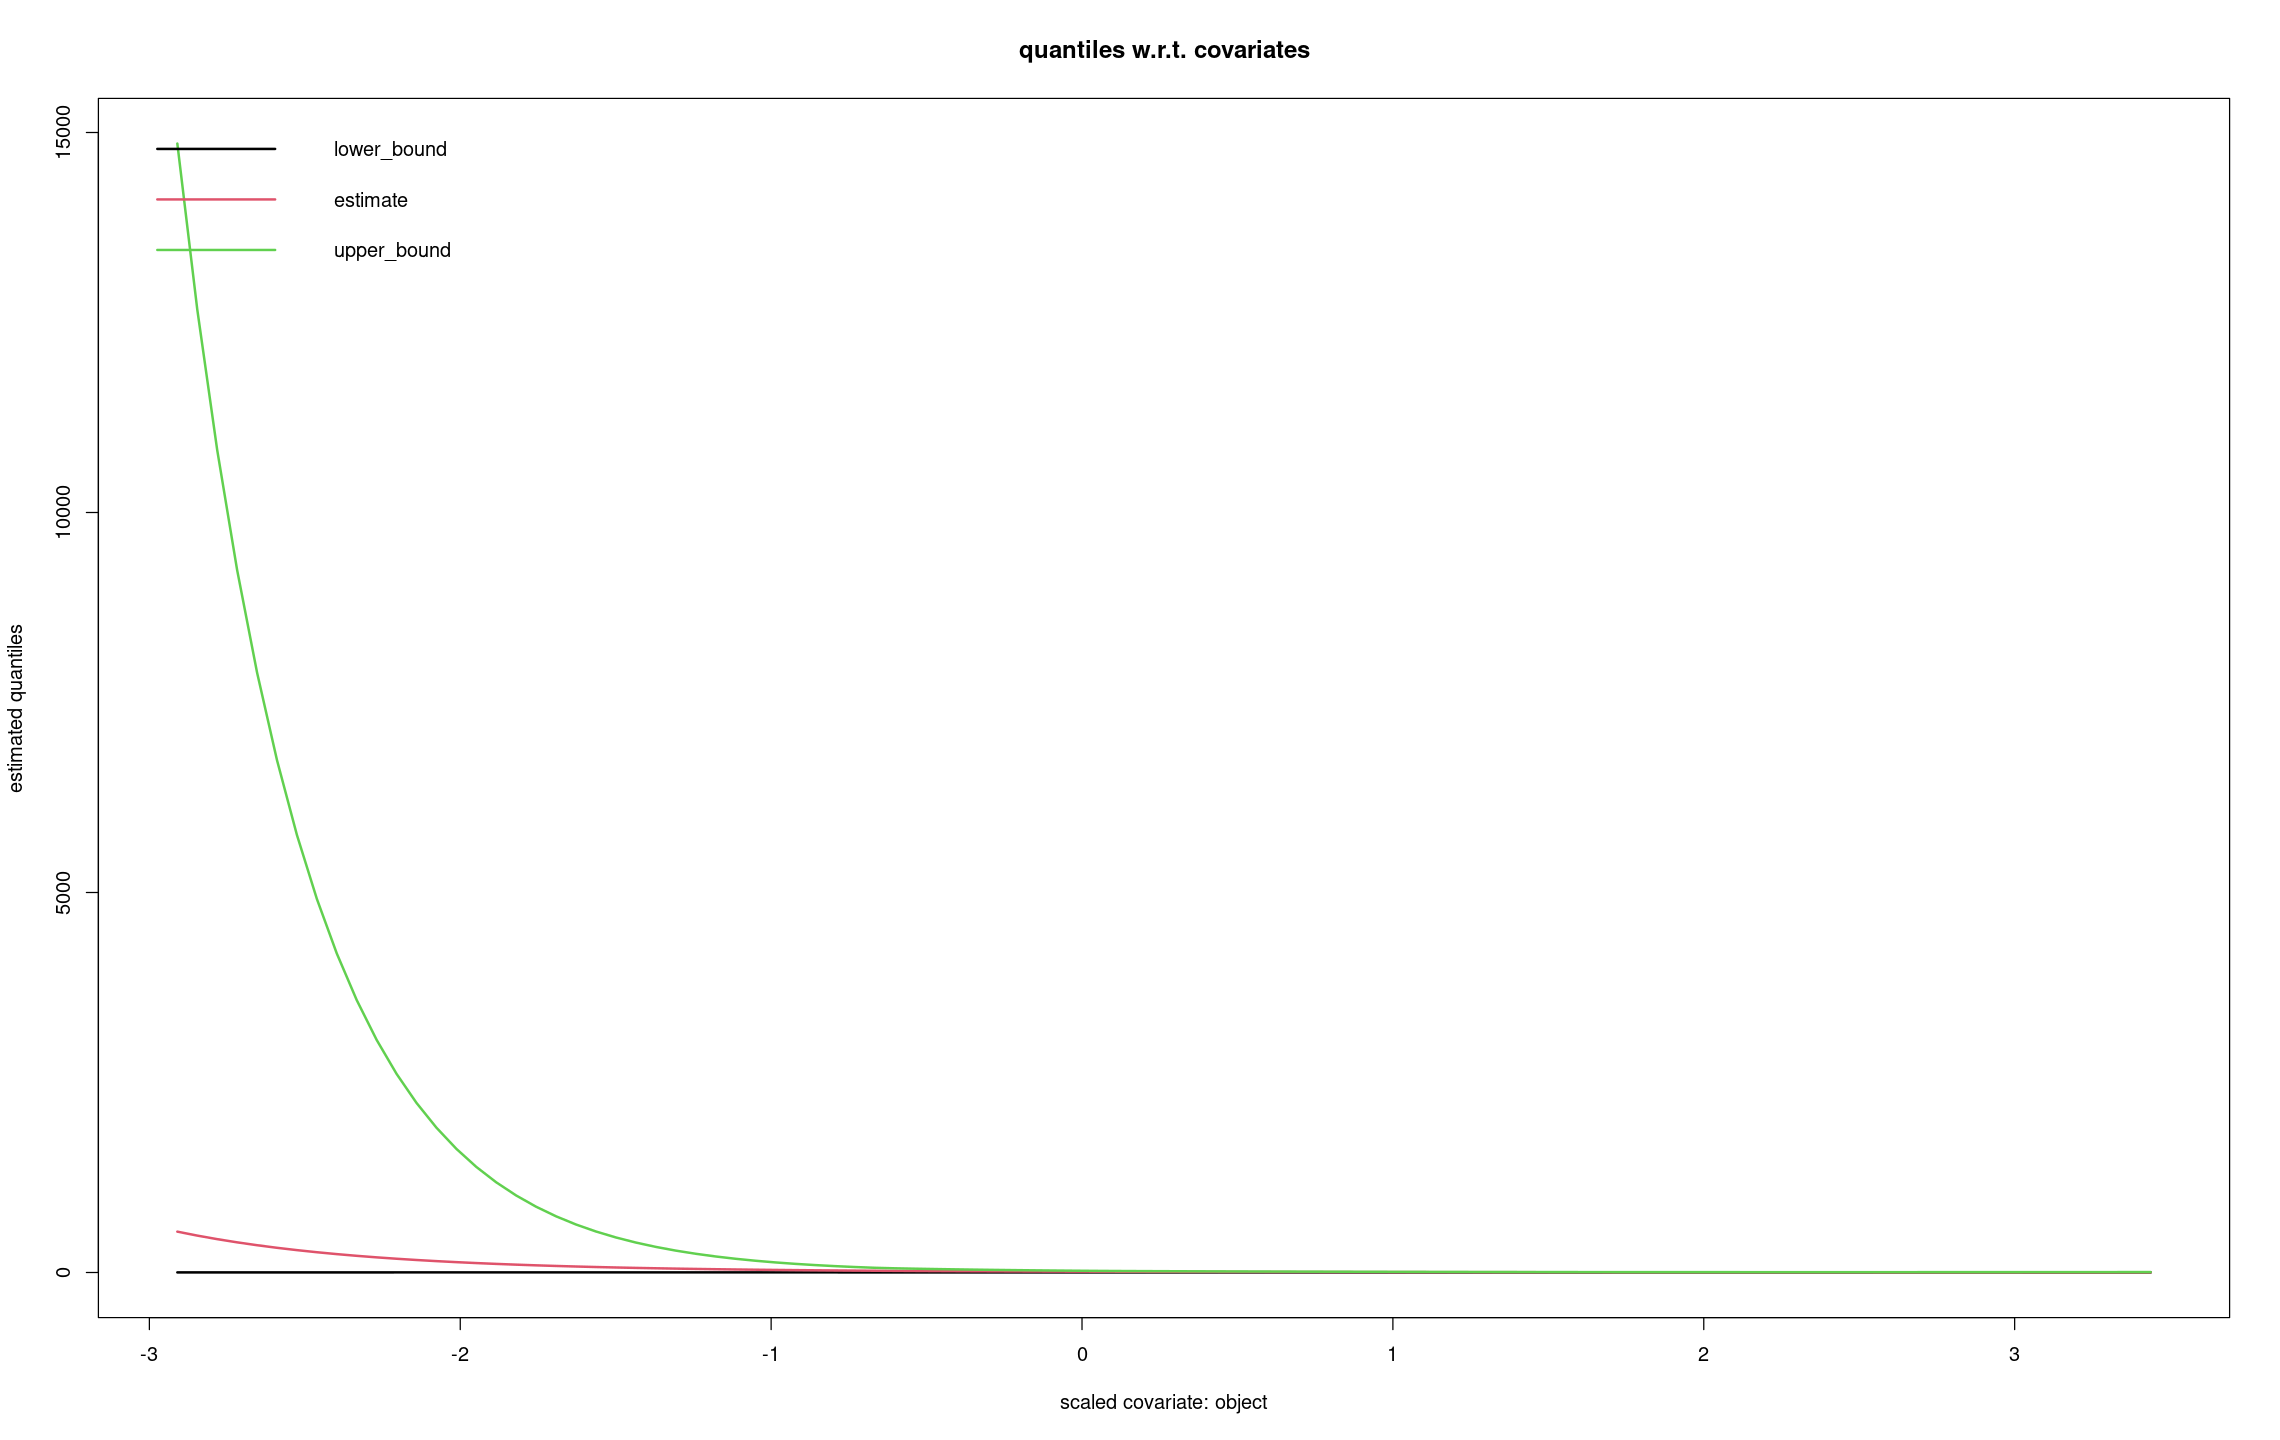

In [135]:
options(repr.plot.width=19, repr.plot.height=12)

matplot(x = new_covariates_values[, selected_model_variable], 
        y = quantiles_new_covariates_values,
        type = "l",
        lty = 1,
        lwd = 2,
        main = "quantiles w.r.t. covariates",
        xlab = paste("scaled covariate:", selected_model_variable),
        ylab = "estimated quantiles")

legend("topleft", legend = c("lower_bound", "estimate", "upper_bound"), col = 1:3, lty = 1, lwd = 2, horiz = FALSE, bty = "n")

## Custom quantile

In [63]:
true_quantile <- NULL

print(true_quantile)

NULL


In [65]:
custom_covariates_scaled <- data.frame("var" = 7)

names(custom_covariates_scaled) <- selected_model_variable

custom_covariates_scaled

name_person
<dbl>
7


In [66]:
several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models

predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
                                                                       data = custom_covariates_scaled,
                                                                       use_extremal_index = TRUE,
                                                                       normalize_parameters = TRUE)

do.call(rbind, predicted_parameters)

,location,scale,shape
,<dbl>,<dbl>,<dbl>
3,1.03560690153,0.4284915654,0.4810110549
5,1.03167108573,0.4224321241,0.4794984418
6,0.96830936510,0.3942641525,0.4847723920
7,0.92005466596,0.3637796656,0.4765588361
98,0.74521064276,0.2073850831,0.4634497762
101,0.49649808295,0.2139541811,0.4216701982
147,0.83977726555,0.2086881410,0.4564703467
152,0.93059891071,0.2247466063,0.5000024760
162,0.70498752652,0.1885226441,0.5640372814


In [130]:
# index <- which.max(x)
# 
# new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)
# 
# new_data_covariates_scaled |> select(all_of(selected_model_variable))

In [133]:
# several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models
# 
# predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
#                                                                        data = new_data_covariates_scaled,
#                                                                        use_extremal_index = TRUE,
#                                                                        normalize_parameters = TRUE)
# 
# do.call(rbind, predicted_parameters)

In [67]:
results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = custom_covariates_scaled,
                                                                        do.ci = TRUE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,55.162579875,74.93070745,94.69883503
5,48.300661402,73.08906719,97.87747298
6,44.320987920,70.83888973,97.35679154
7,37.190871801,61.66693503,86.14299825
98,-8.481076174,32.25517306,72.99142229
101,-5.321961595,24.65052263,54.62300685
147,-15.872457361,30.99910811,77.87067358
152,-41.171068810,45.42980433,132.03067746
162,-63.041749859,60.58165019,184.20505024


In [68]:
results_arithmetic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                         alpha = alpha,
                                                                         data = custom_covariates_scaled,
                                                                         do.ci = TRUE,
                                                                         confidence_level = 0.95,
                                                                         kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                         iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,55.162579875,74.93070745,94.69883503
5,48.300661402,73.08906719,97.87747298
6,44.320987920,70.83888973,97.35679154
7,37.190871801,61.66693503,86.14299825
98,-8.481076174,32.25517306,72.99142229
101,-5.321961595,24.65052263,54.62300685
147,-15.872457361,30.99910811,77.87067358
152,-41.171068810,45.42980433,132.03067746
162,-63.041749859,60.58165019,184.20505024


In [69]:
results_harmonic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                       alpha = alpha,
                                                                       data = custom_covariates_scaled,
                                                                       do.ci = TRUE,
                                                                       confidence_level = 0.95,
                                                                       kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                       iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
3,55.162579875,74.93070745,94.69883503
5,48.300661402,73.08906719,97.87747298
6,44.320987920,70.83888973,97.35679154
7,37.190871801,61.66693503,86.14299825
98,-8.481076174,32.25517306,72.99142229
101,-5.321961595,24.65052263,54.62300685
147,-15.872457361,30.99910811,77.87067358
152,-41.171068810,45.42980433,132.03067746
162,-63.041749859,60.58165019,184.20505024


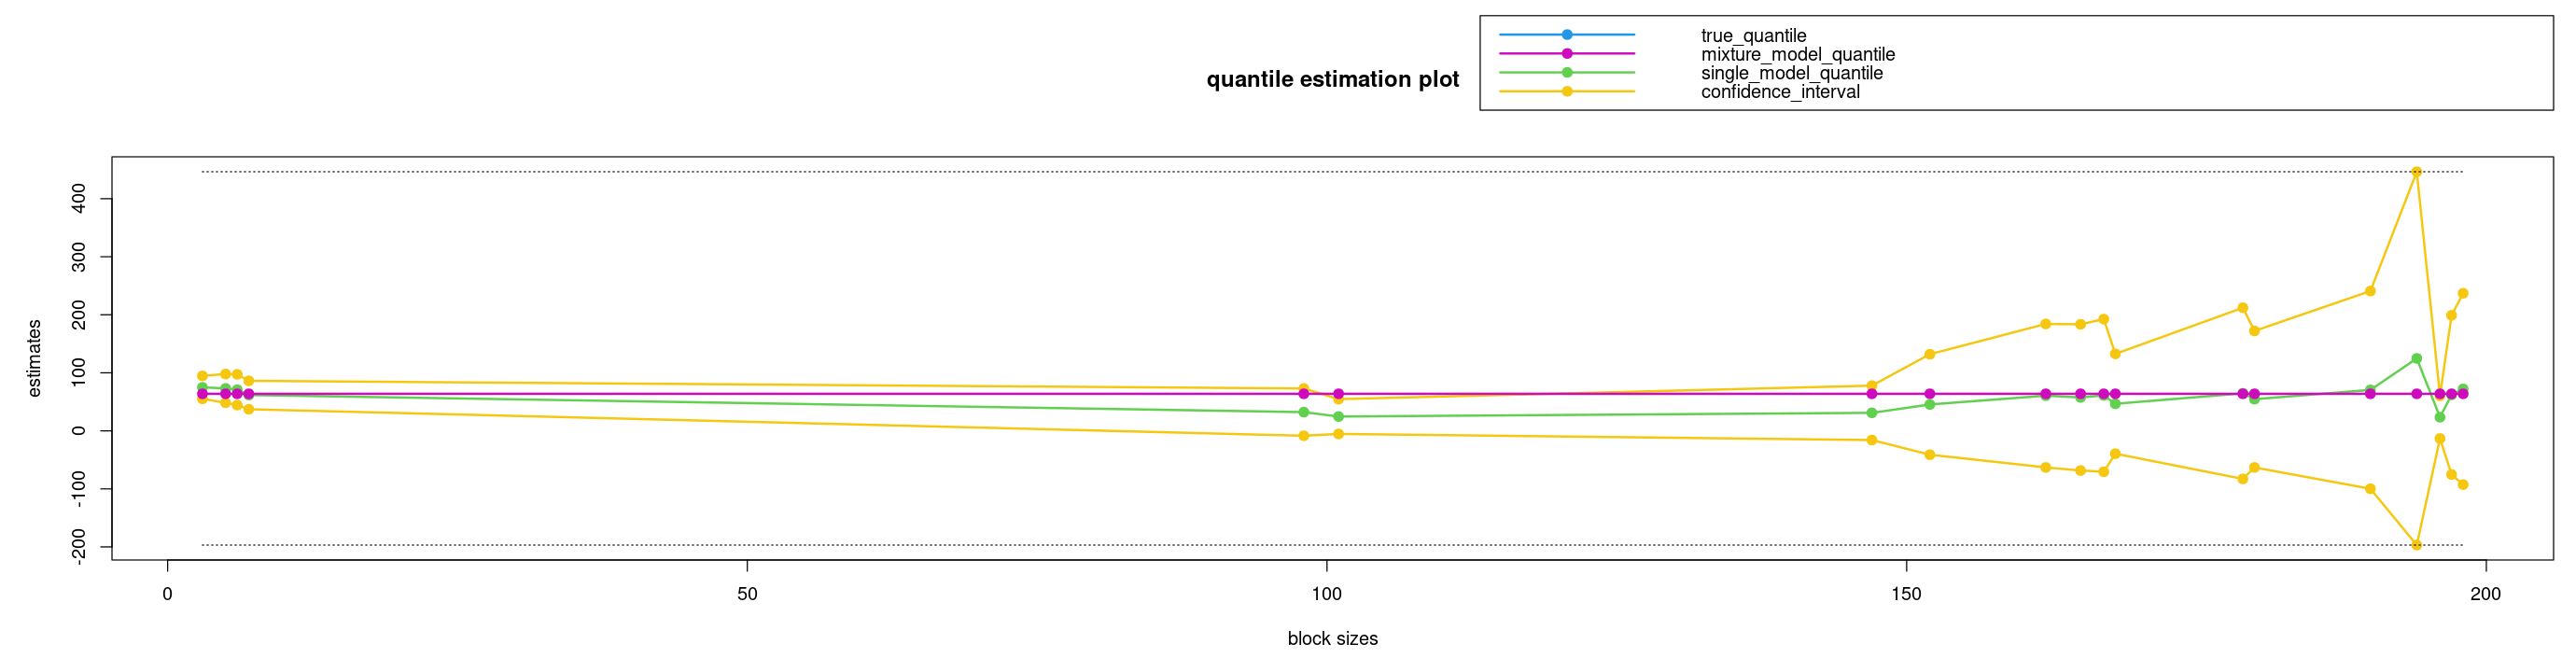

In [70]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                        alpha = alpha,
                                                        data = custom_covariates_scaled,
                                                        data_index = 1,
                                                        true_quantile = NULL,
                                                        do.ci = TRUE,
                                                        confidence_level = 0.95,
                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                        iterations = 100,
                                                        xlab = "block sizes",
                                                        ylab = "estimates",
                                                        main = "quantile estimation plot",
                                                        legend_position = "topright")
